In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def nullcount(df):
    nullcounts={}
    for col in df:
        nullcounts[col] = df[col].isnull().sum()
    return nullcounts

In [3]:
df = pd.read_csv('capstone_data.csv')

In [4]:
df.shape

(284, 644)

In [5]:
df.head()

,State_Name,State_District_Name,AA_Sample_Units_Total,AA_Sample_Units_Rural,AA_Sample_Units_Urban,AA_Households_Total,AA_Households_Rural,AA_Households_Urban,AA_Population_Total,AA_Population_Rural,...,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Total_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit
0,Assam,Barpeta,53,47,6,13711,12765,946,64606,60293,...,54,70,NaN,NaN,871,985,851,965,908.0,1611.0
1,Assam,Bongaigaon,89,73,16,17384,14904,2480,84012,73899,...,58,73,NaN,NaN,897,1005,911,1026,621.0,956.0
2,Assam,Cachar,105,84,21,27488,24207,3281,127158,112171,...,68,80,31.0,57.0,891,966,871,949,905.0,1168.0
3,Assam,Darrang,26,24,2,5951,5769,182,29048,28256,...,79,107,NaN,NaN,913,1102,908,1097,NaN,NaN
4,Assam,Dhemaji,121,108,13,14481,12619,1862,75451,66537,...,40,53,11.0,38.0,935,1045,938,1054,772.0,1083.0


In [6]:
states = list(df.State_Name.unique())
print(len(states))
states

9


['Assam',
 'Bihar',
 'Chhattisgarh',
 'Jharkhand',
 'Madhya Pradesh',
 'Odisha',
 'Rajasthan',
 'Uttar Pradesh',
 'Uttarakhand']

In [7]:
df.YY_Crude_Death_Rate_Cdr_Total_Person

0      6.60
1      6.10
2      7.30
3      8.10
4      4.50
       ... 
279    6.16
280    6.06
281    8.74
282    5.30
283    4.63
Name: YY_Crude_Death_Rate_Cdr_Total_Person, Length: 284, dtype: float64

In [59]:
 ## Range of the target variable
print(df.YY_Infant_Mortality_Rate_Imr_Total_Person.min())
print(df.YY_Infant_Mortality_Rate_Imr_Total_Person.max())

19.22
97.0


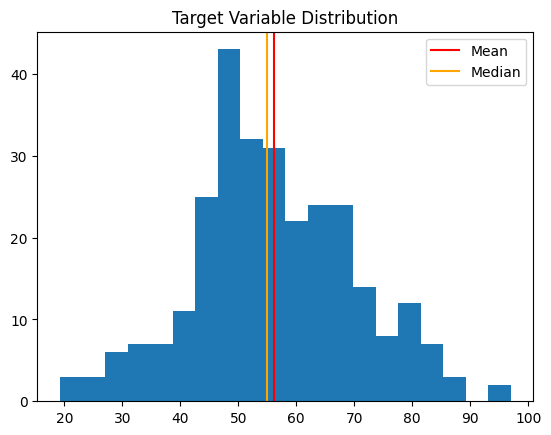

In [60]:
## Target Variable Distribution
plt.hist(df.YY_Infant_Mortality_Rate_Imr_Total_Person, bins=20)
plt.axvline(df.YY_Infant_Mortality_Rate_Imr_Total_Person.mean(), color='red', label='Mean')
plt.axvline(df.YY_Infant_Mortality_Rate_Imr_Total_Person.median(), color='orange', label = 'Median')
plt.title('Target Variable Distribution'), plt.legend()
plt.show()

In [61]:
## Target Var Nulls
df.YY_Infant_Mortality_Rate_Imr_Total_Person.isna().sum()

0

In [62]:
## Correlation overview
df.select_dtypes(include='number').corr()

,AA_Sample_Units_Total,AA_Sample_Units_Rural,AA_Sample_Units_Urban,AA_Households_Total,AA_Households_Rural,AA_Households_Urban,AA_Population_Total,AA_Population_Rural,AA_Population_Urban,AA_Ever_Married_Women_Aged_15_49_Years_Total,...,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Total_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit
AA_Sample_Units_Total,1.000000,0.879744,0.664112,0.915218,0.794245,0.613484,0.872806,0.737195,0.593355,0.894308,...,-0.407542,-0.475705,-0.199355,-0.474226,0.055085,-0.233965,0.040244,-0.211274,0.228764,-0.252206
AA_Sample_Units_Rural,0.879744,1.000000,0.228788,0.784546,0.879880,0.187966,0.741014,0.818504,0.161093,0.759552,...,-0.371923,-0.460122,-0.259108,-0.344661,0.095245,-0.161355,0.115704,-0.178947,0.078635,-0.087441
AA_Sample_Units_Urban,0.664112,0.228788,1.000000,0.640218,0.242616,0.960531,0.621832,0.222319,0.961576,0.636709,...,-0.249597,-0.250470,-0.010903,-0.426447,-0.036984,-0.225313,-0.099542,-0.151190,0.340372,-0.374116
AA_Households_Total,0.915218,0.784546,0.640218,1.000000,0.889939,0.632763,0.975385,0.853393,0.610511,0.983661,...,-0.346214,-0.454737,-0.172191,-0.446895,0.155811,-0.221557,0.141646,-0.208497,0.270664,-0.200014
AA_Households_Rural,0.794245,0.879880,0.242616,0.889939,1.000000,0.209956,0.877945,0.972468,0.186031,0.878744,...,-0.310141,-0.450367,-0.234610,-0.315159,0.214719,-0.156330,0.237102,-0.188050,0.131485,-0.025769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit,-0.233965,-0.161355,-0.225313,-0.221557,-0.156330,-0.209536,-0.218823,-0.144190,-0.221046,-0.214626,...,0.098773,0.116778,-0.011618,0.064631,0.867833,1.000000,0.816740,0.951709,0.238832,0.431214
ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit,0.040244,0.115704,-0.099542,0.141646,0.237102,-0.098910,0.186992,0.286058,-0.100797,0.172307,...,0.002275,-0.084525,-0.030420,-0.049610,0.945090,0.816740,1.000000,0.840699,0.164187,0.217395
ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit,-0.211274,-0.178947,-0.151190,-0.208497,-0.188050,-0.127684,-0.203252,-0.174845,-0.132533,-0.199375,...,0.067337,0.094519,-0.011284,0.000601,0.817622,0.951709,0.840699,1.000000,0.111252,0.213575
ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit,0.228764,0.078635,0.340372,0.270664,0.131485,0.354504,0.274554,0.131205,0.363064,0.282345,...,-0.053664,-0.072759,0.206472,-0.128872,0.369880,0.238832,0.164187,0.111252,1.000000,0.348455


In [63]:
# Ordered correlation with target var
target_corr = dict(df.select_dtypes(include='number').corr()['YY_Infant_Mortality_Rate_Imr_Total_Person'])
sorted(target_corr.items(), key = lambda item: item[1])

[('AA_Ever_Married_Women_Aged_15_49_Years_Total', -0.46490693987258225),
 ('AA_Sample_Units_Total', -0.46264395007808556),
 ('AA_Currently_Married_Women_Aged_15_49_Years_Total', -0.46131720709828333),
 ('AA_Households_Total', -0.45026414495221373),
 ('AA_Population_Total', -0.43469756366175855),
 ('AA_Ever_Married_Women_Aged_15_49_Years_Rural', -0.38507912203215633),
 ('AA_Currently_Married_Women_Aged_15_49_Years_Rural', -0.3801038049079371),
 ('AA_Sample_Units_Rural', -0.37950860060501085),
 ('AA_Households_Rural', -0.37738595510442596),
 ('AA_Sample_Units_Urban', -0.3504900403988108),
 ('AA_Population_Rural', -0.3503945573299793),
 ('AA_Ever_Married_Women_Aged_15_49_Years_Urban', -0.33271477750463474),
 ('AA_Currently_Married_Women_Aged_15_49_Years_Urban', -0.33103614806887954),
 ('AA_Population_Urban', -0.32533802027461534),
 ('AA_Households_Urban', -0.324506241149795),
 ('AA_Children_12_23_Months_Urban', -0.3062868496789669),
 ('FF_Children_Currently_Attending_School_Age_6_17_Years

In [64]:
# Columns representing totals
col_totals=[]
for c in df.columns:
    if 'Total' in c:
        col_totals.append(c)
col_totals

['AA_Sample_Units_Total',
 'AA_Households_Total',
 'AA_Population_Total',
 'AA_Ever_Married_Women_Aged_15_49_Years_Total',
 'AA_Currently_Married_Women_Aged_15_49_Years_Total',
 'AA_Children_12_23_Months_Total',
 'BB_Average_Household_Size_Sc_Total',
 'BB_Average_Household_Size_St_Total',
 'BB_Average_Household_Size_All_Total',
 'BB_Population_Below_Age_15_Years_Total',
 'BB_Dependency_Ratio_Total',
 'BB_Currently_Married_Illiterate_Women_Aged_15_49_Years_Total',
 'CC_Sex_Ratio_At_Birth_Total',
 'CC_Sex_Ratio_0_4_Years_Total',
 'CC_Sex_Ratio_All_Ages_Total',
 'DD_Person_Total',
 'DD_Male_Total',
 'DD_Female_Total',
 'EE_Marriages_Among_Females_Below_Legal_Age_18_Years_Total',
 'EE_Marriages_Among_Males_Below_Legal_Age_21_Years_Total',
 'EE_Currently_Married_Women_Aged_20_24_Years_Married_Before_Legal_Age_18_Years_Total',
 'EE_Currently_Married_Men_Aged_25_29_Years_Married_Before_Legal_Age_21_Years_Total',
 'EE_Mean_Age_At_Marriage_Male_Total',
 'EE_Mean_Age_At_Marriage_Female_Total',
 

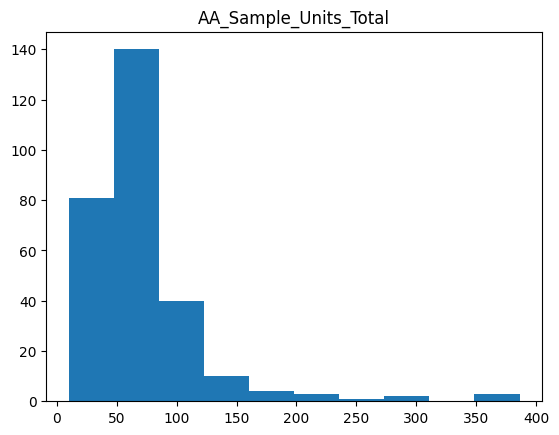

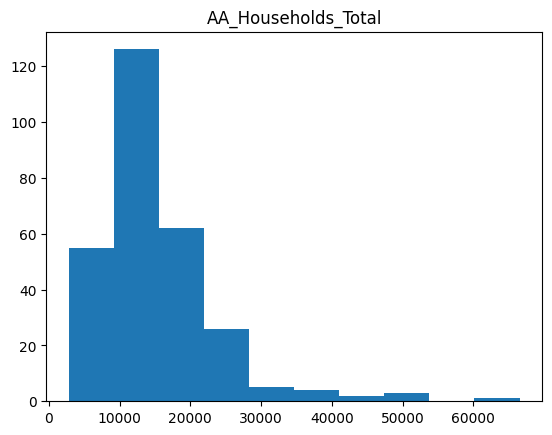

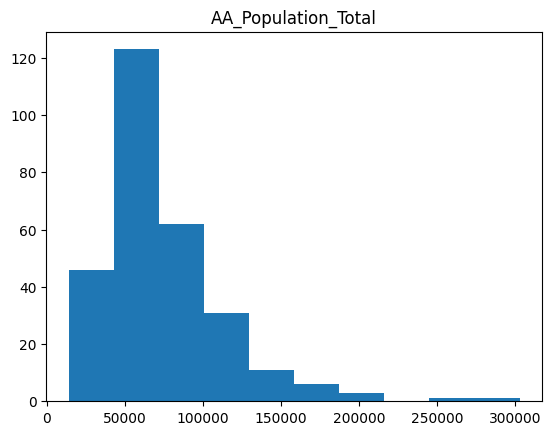

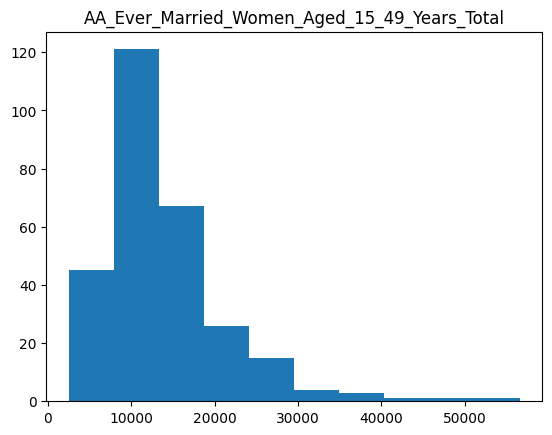

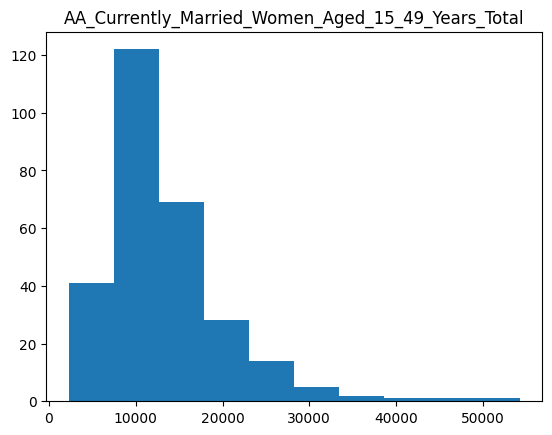

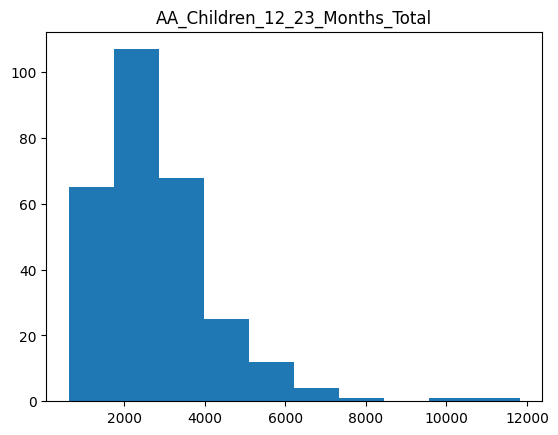

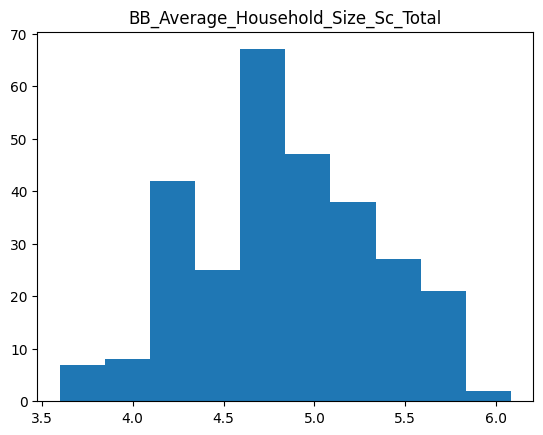

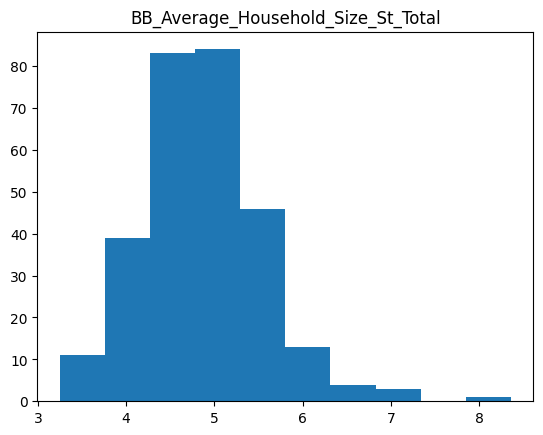

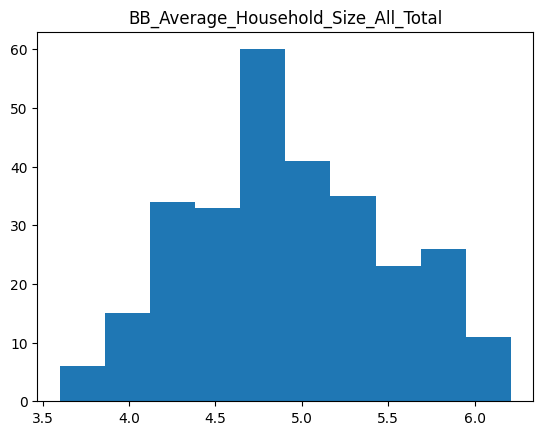

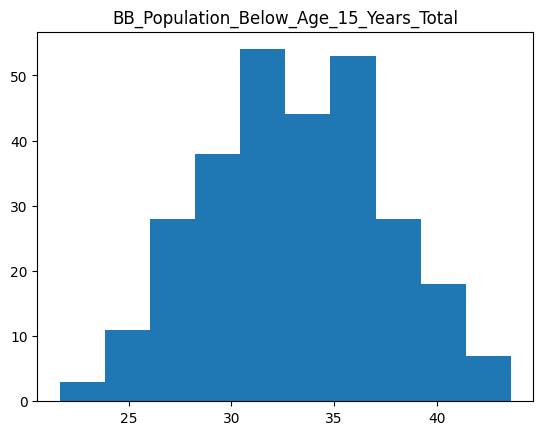

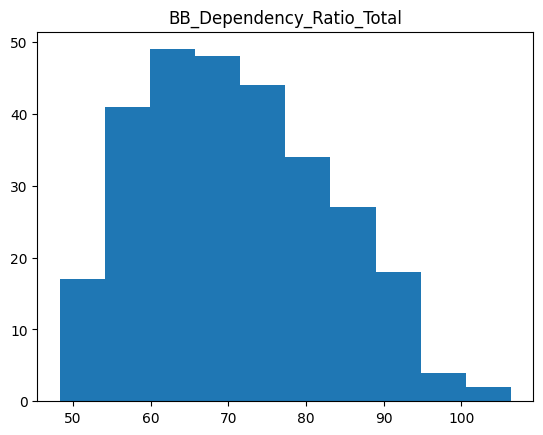

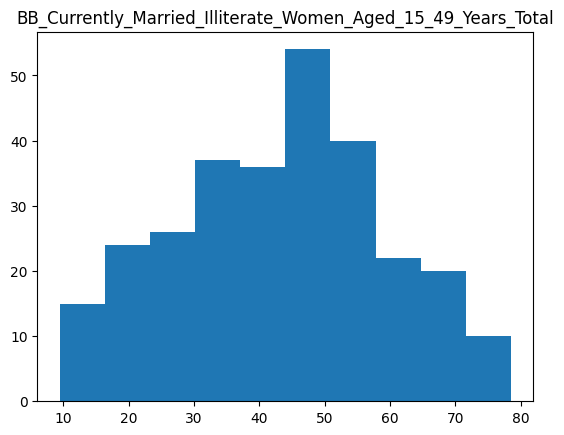

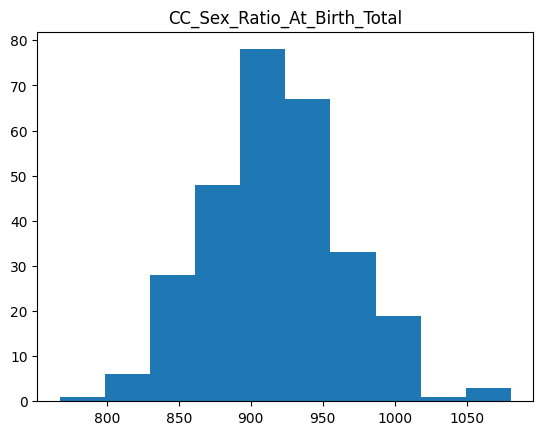

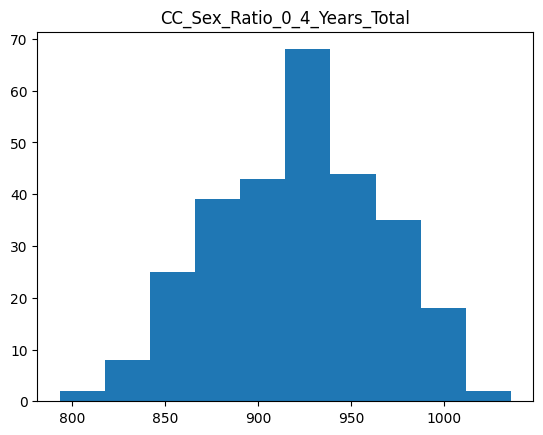

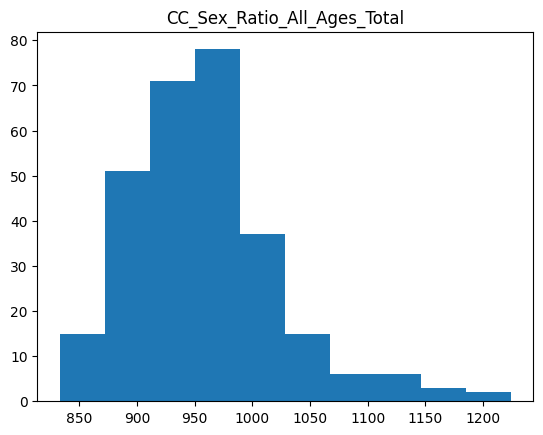

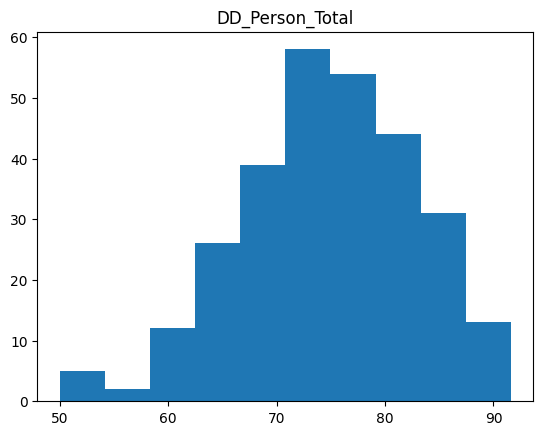

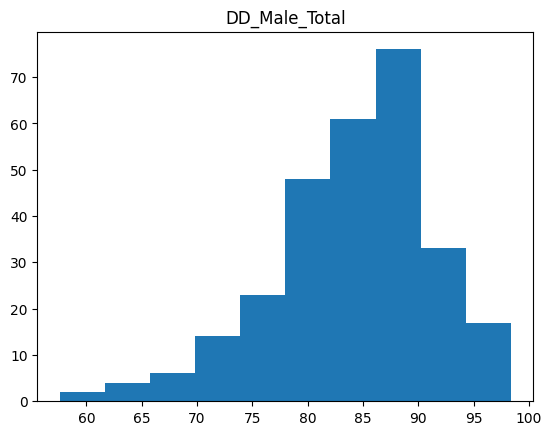

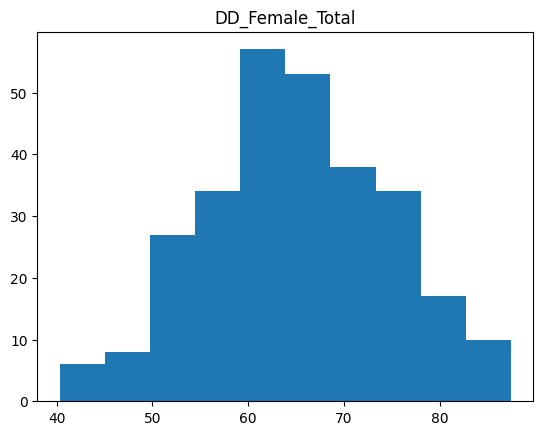

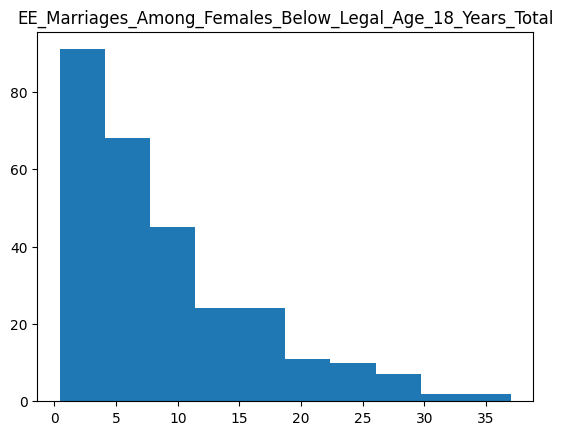

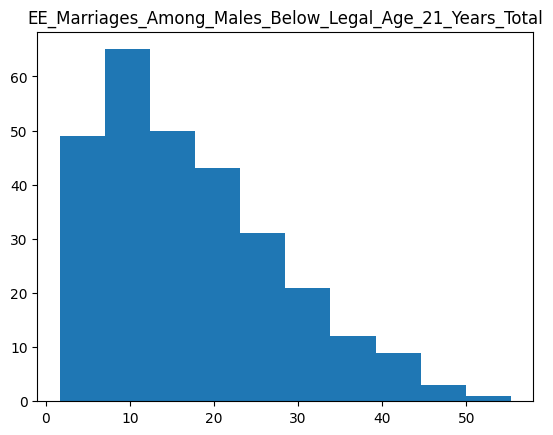

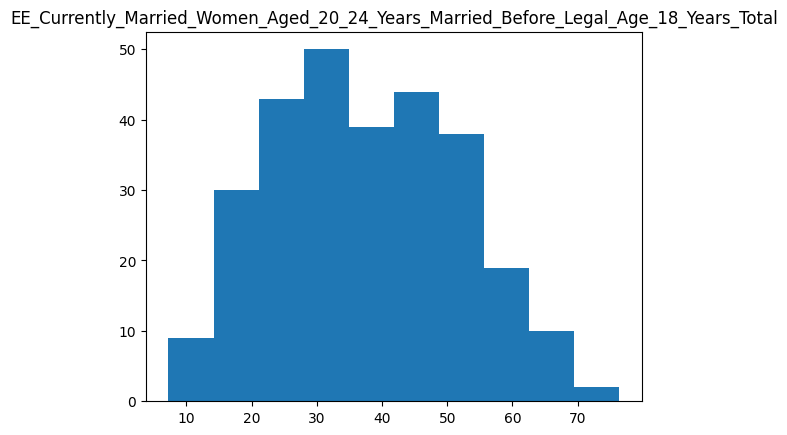

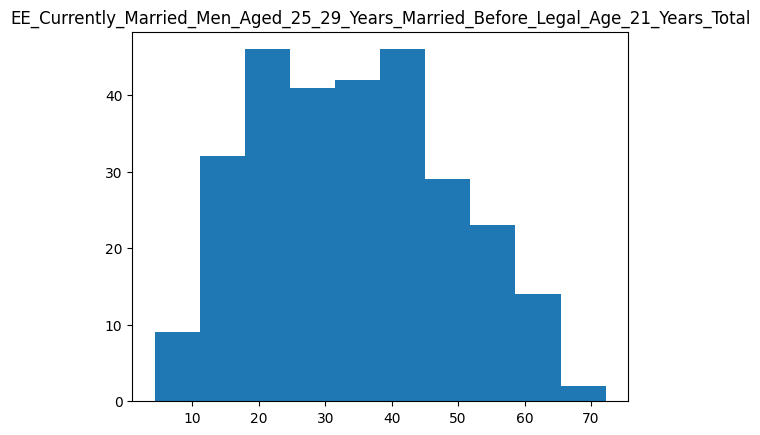

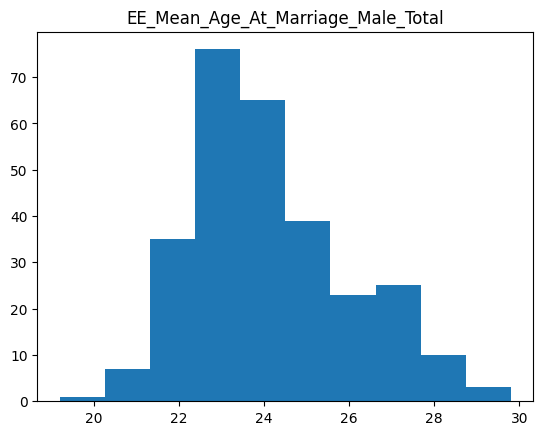

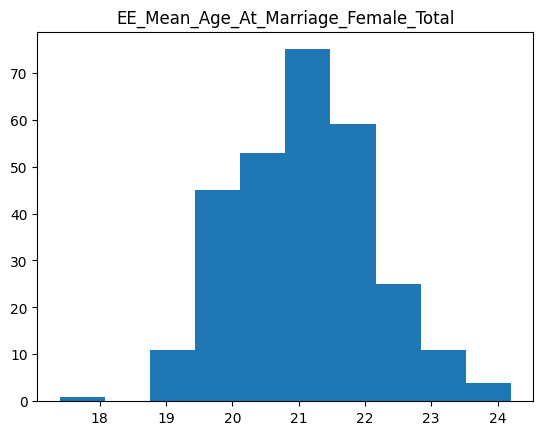

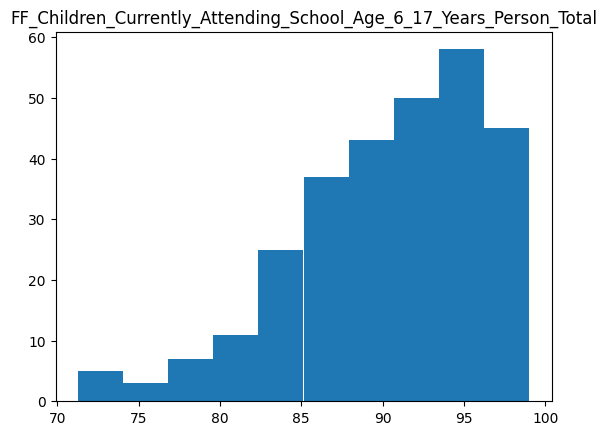

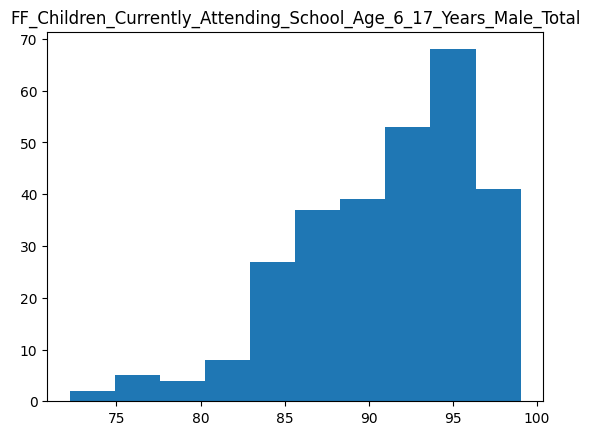

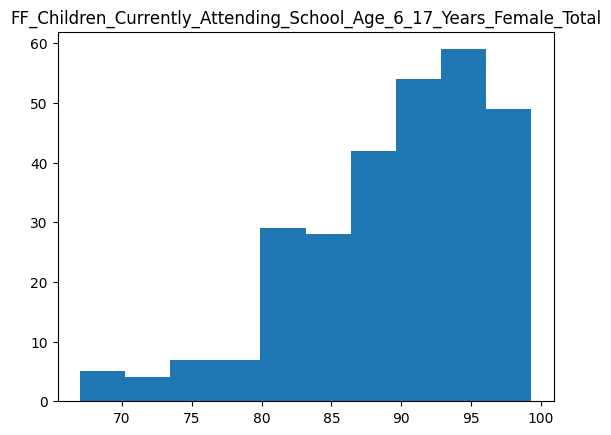

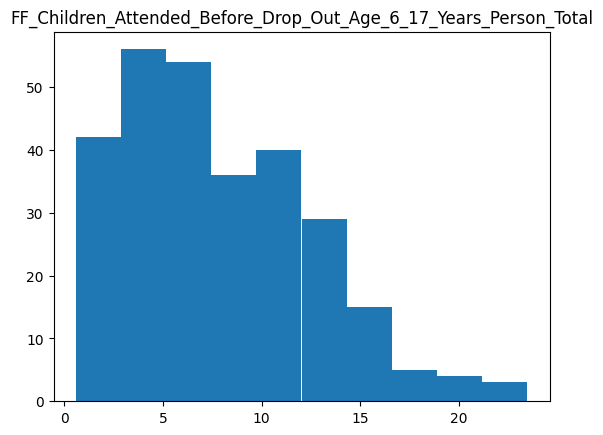

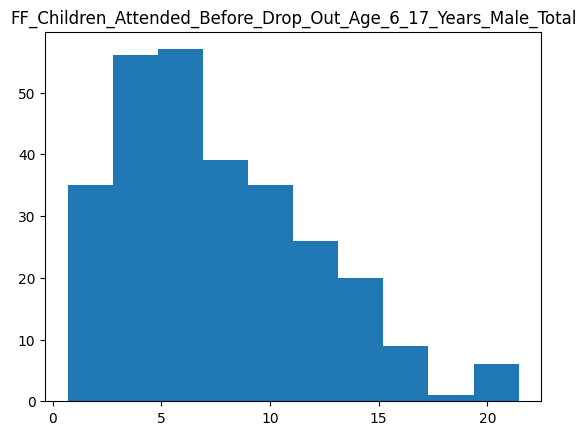

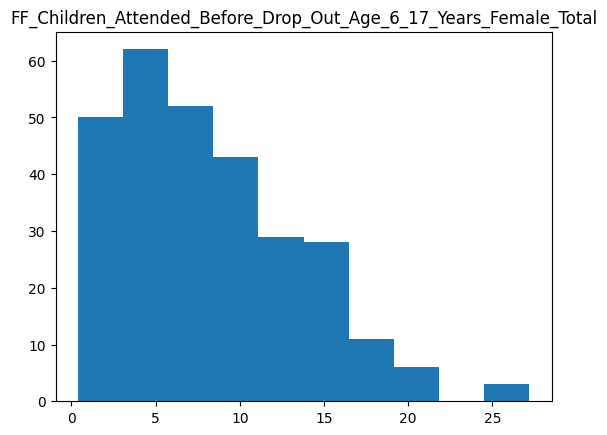

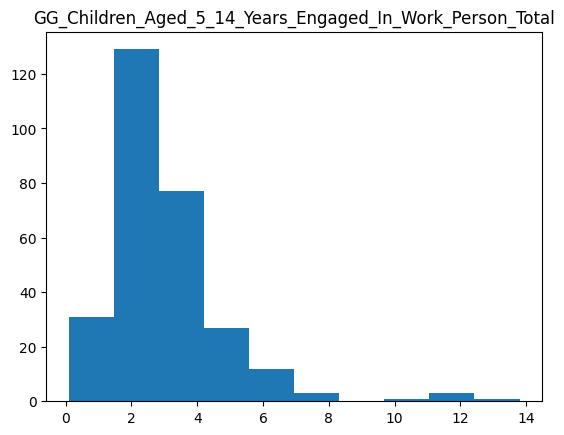

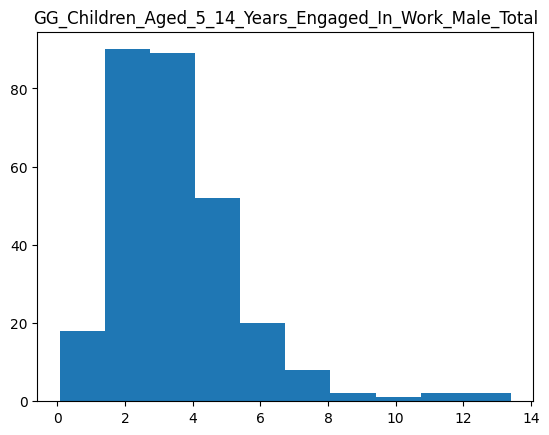

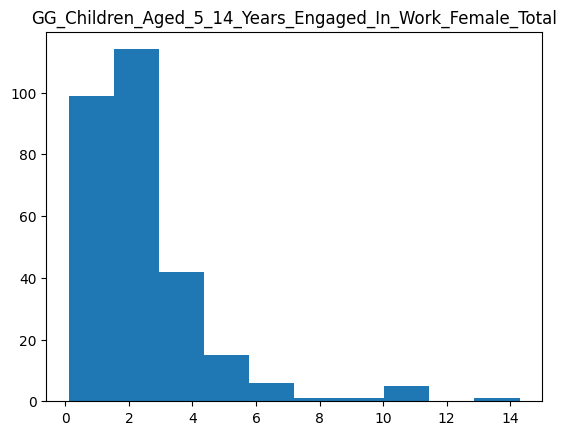

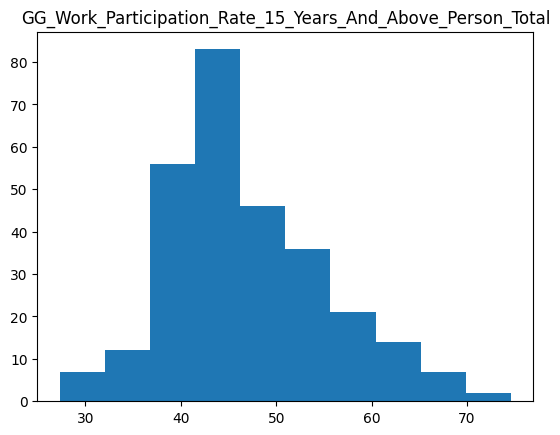

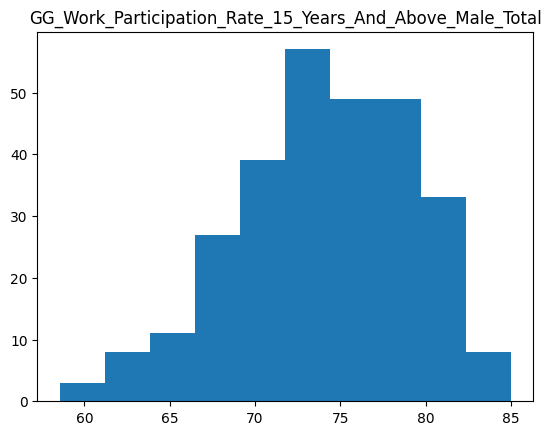

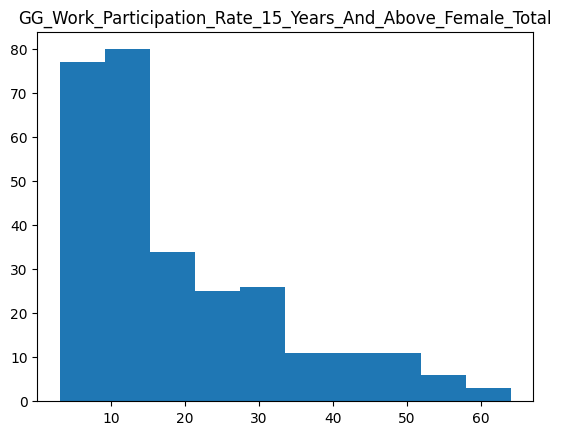

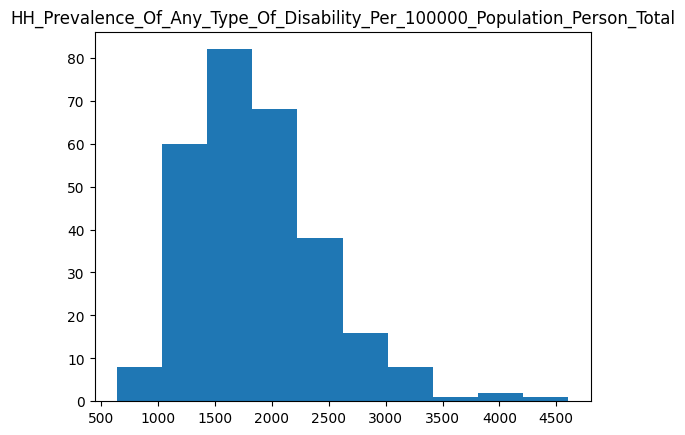

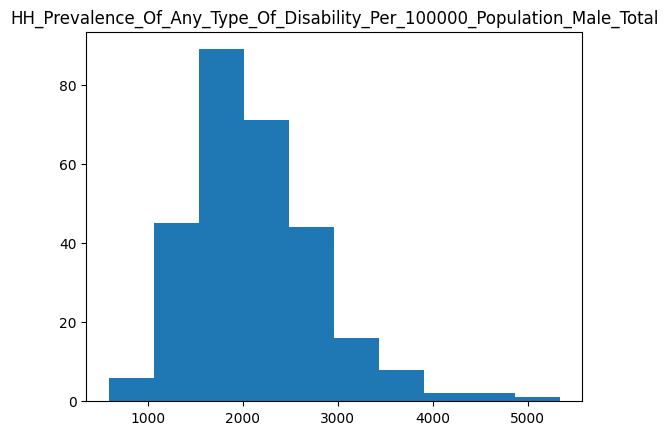

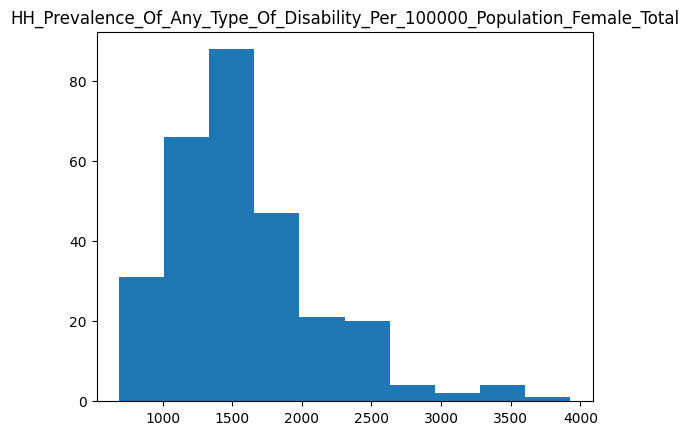

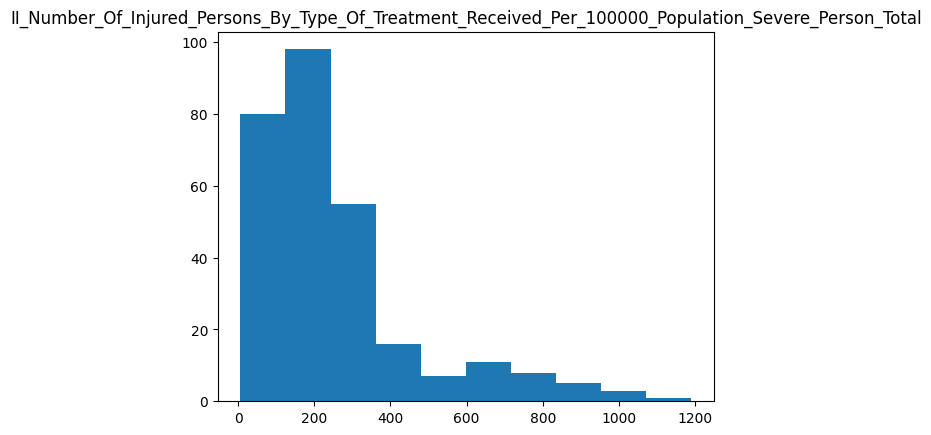

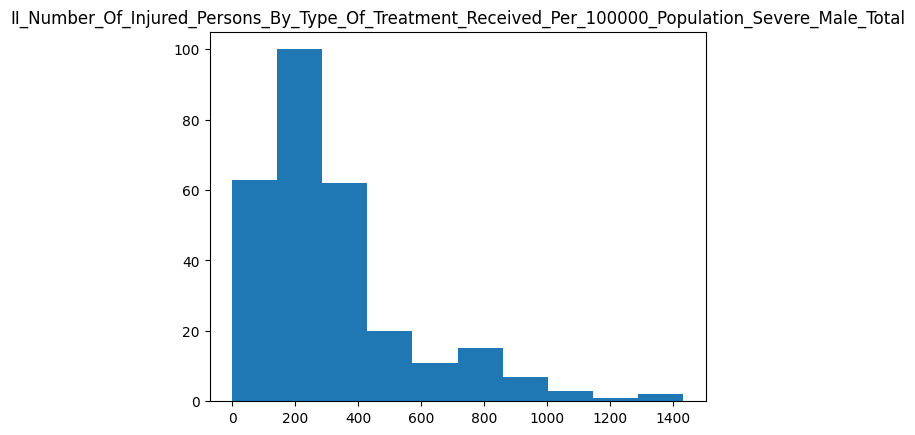

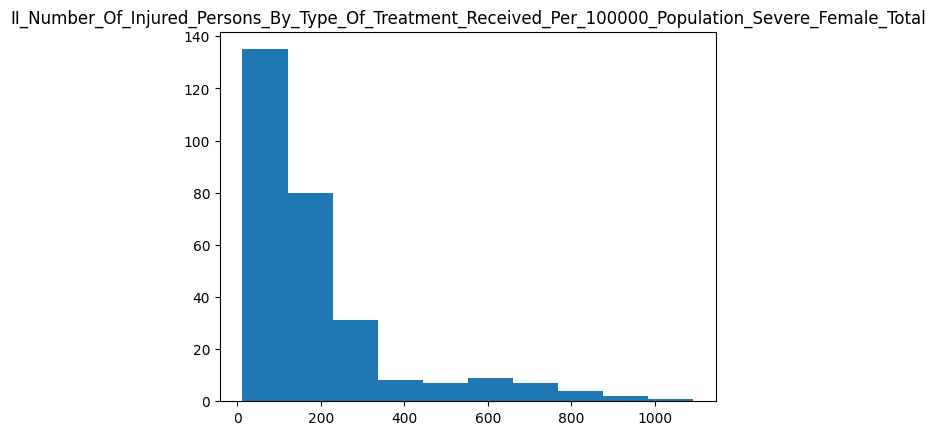

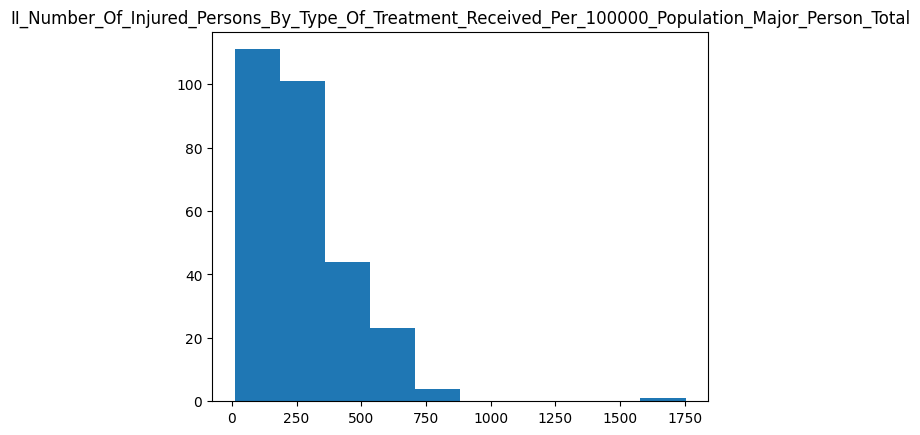

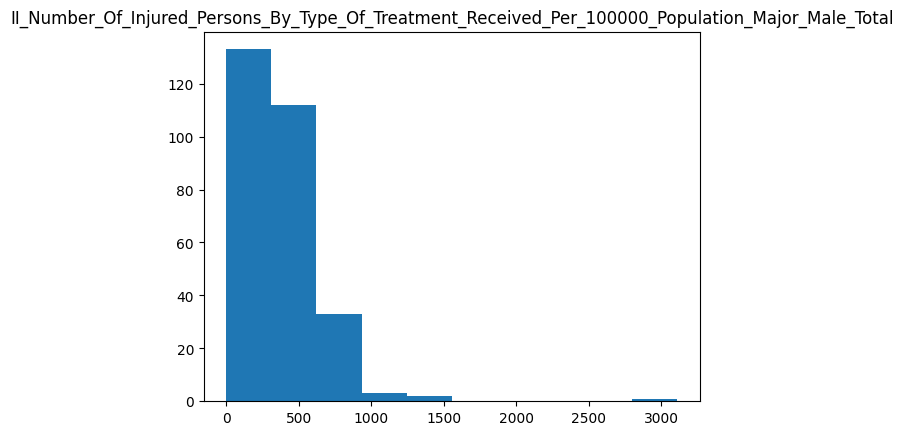

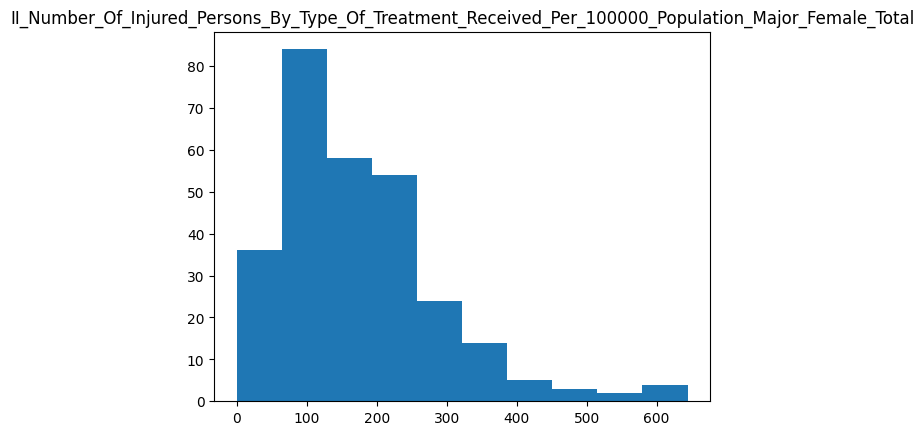

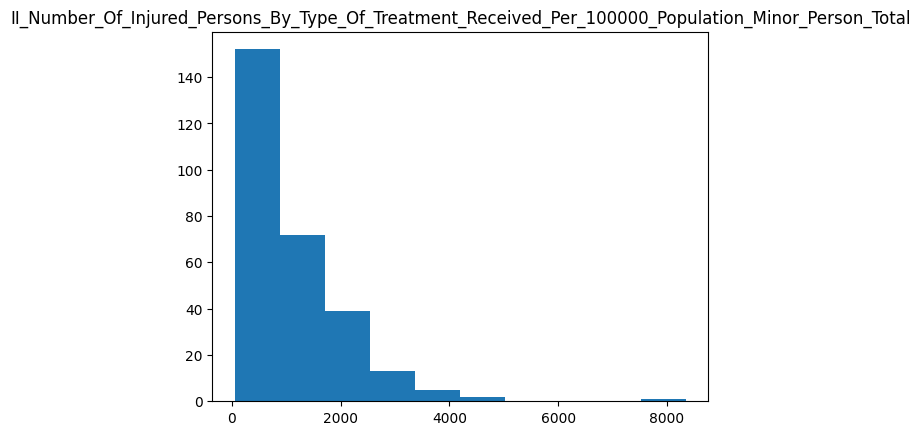

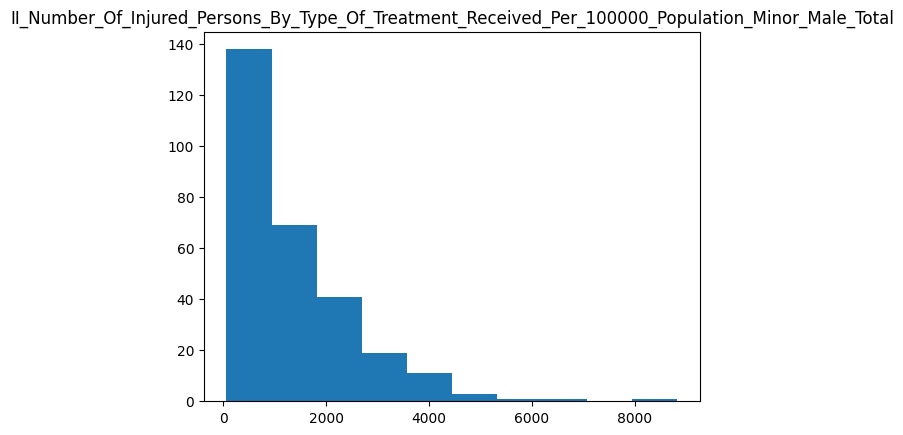

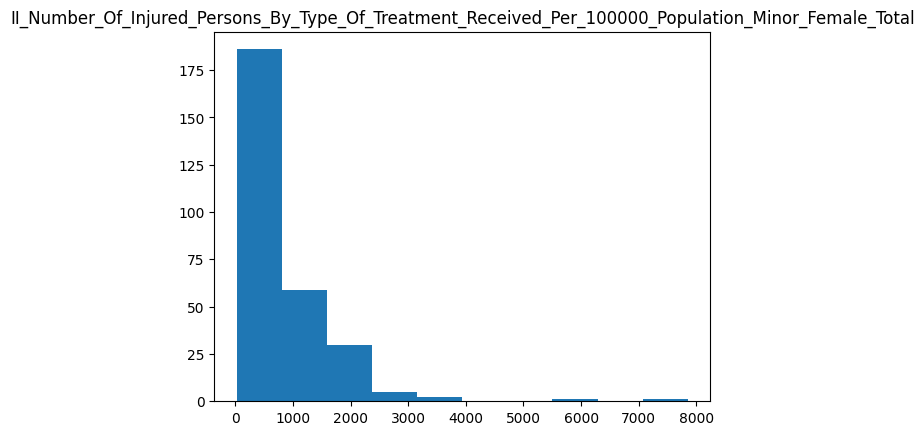

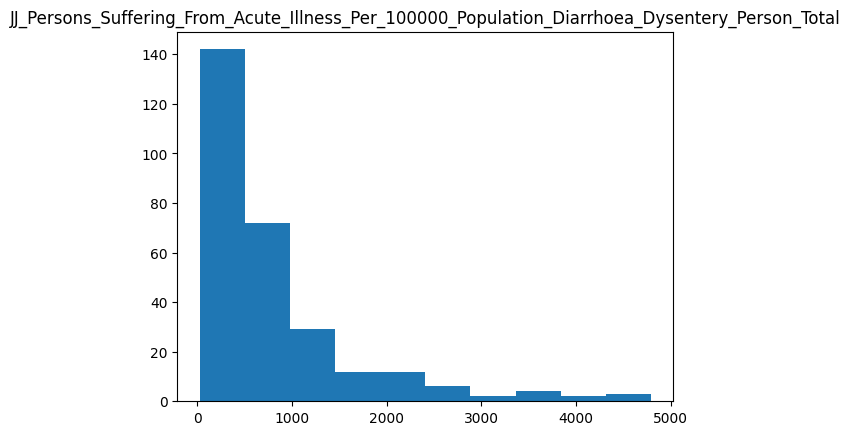

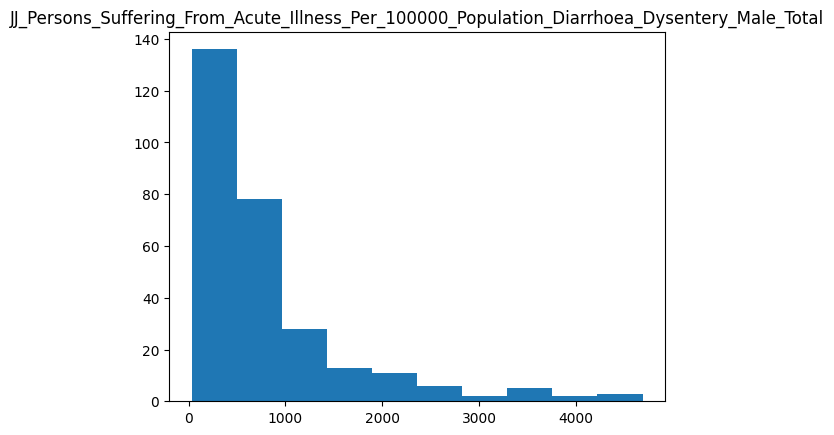

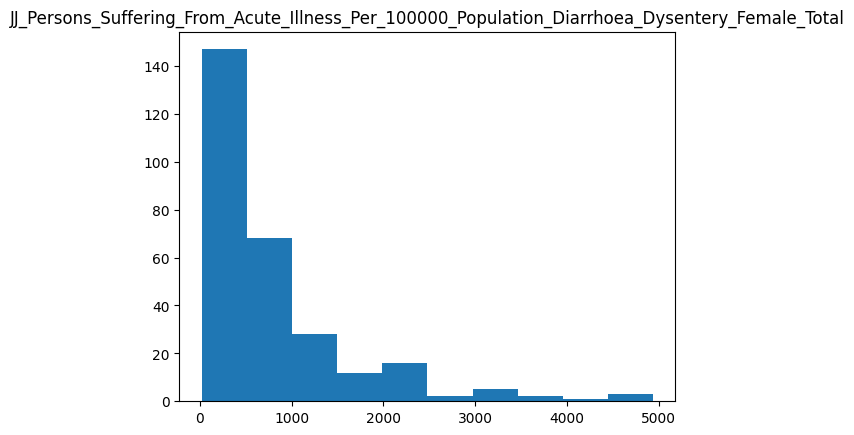

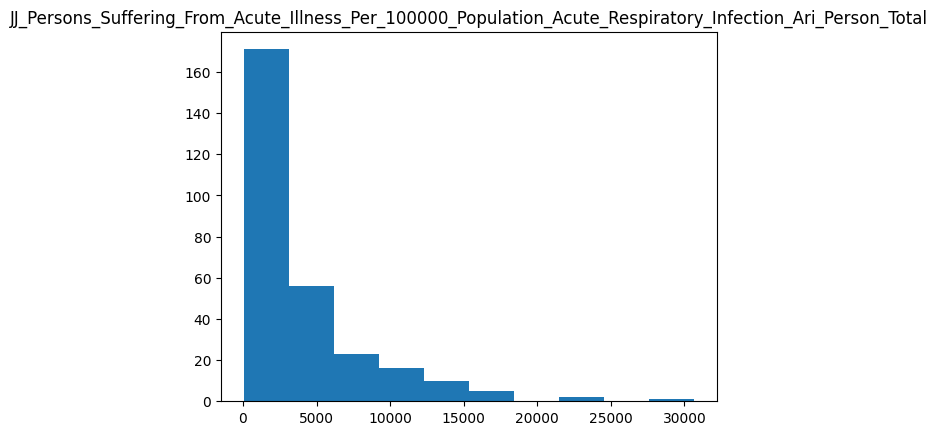

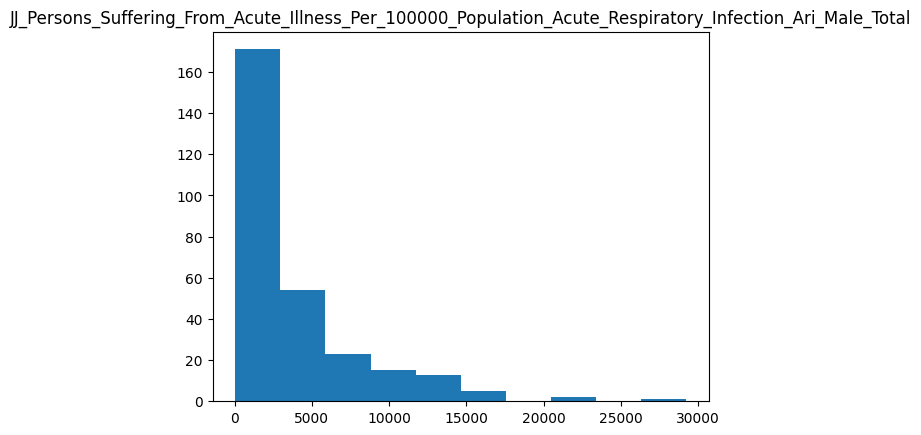

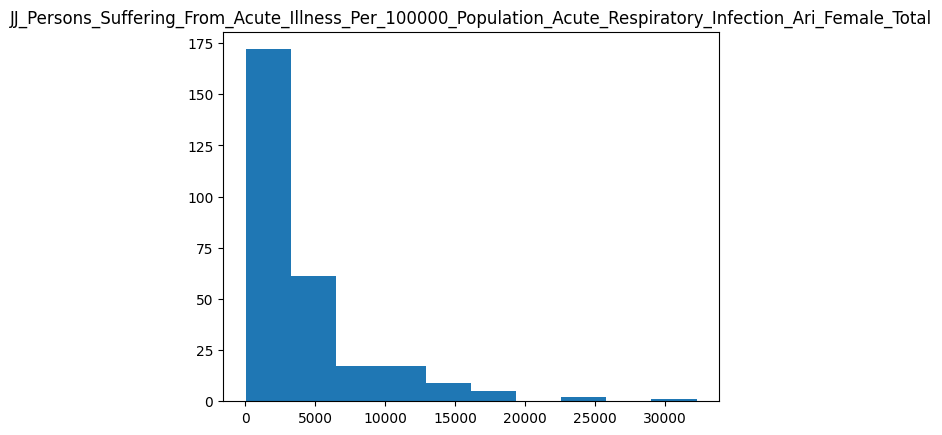

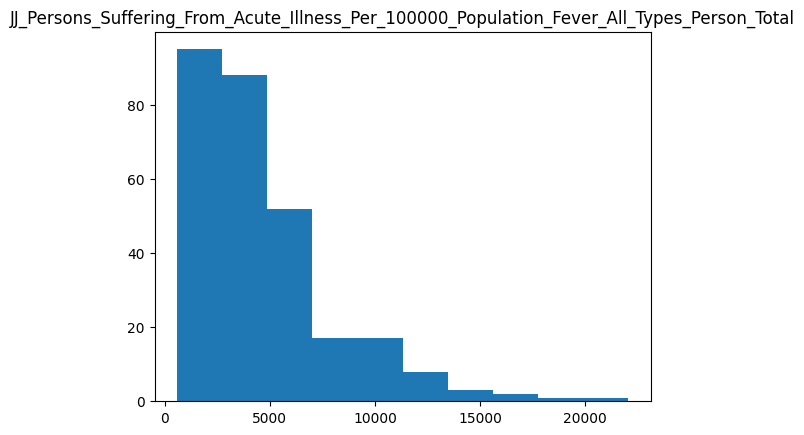

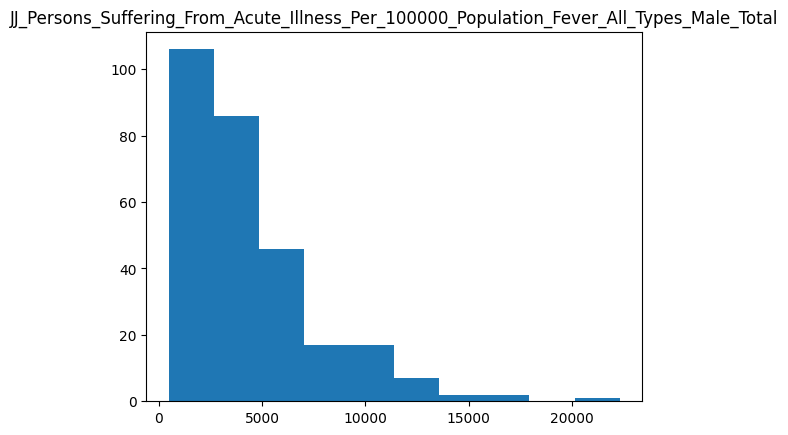

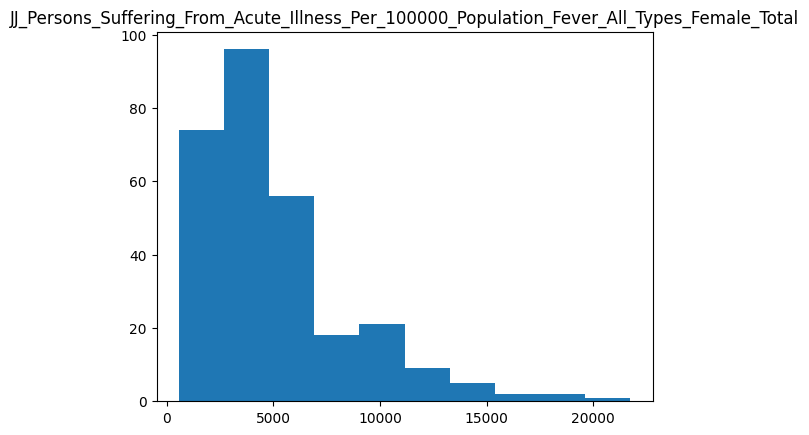

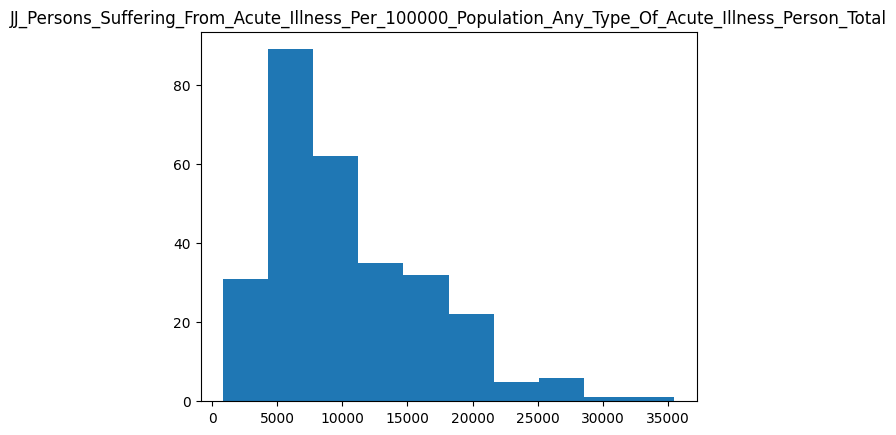

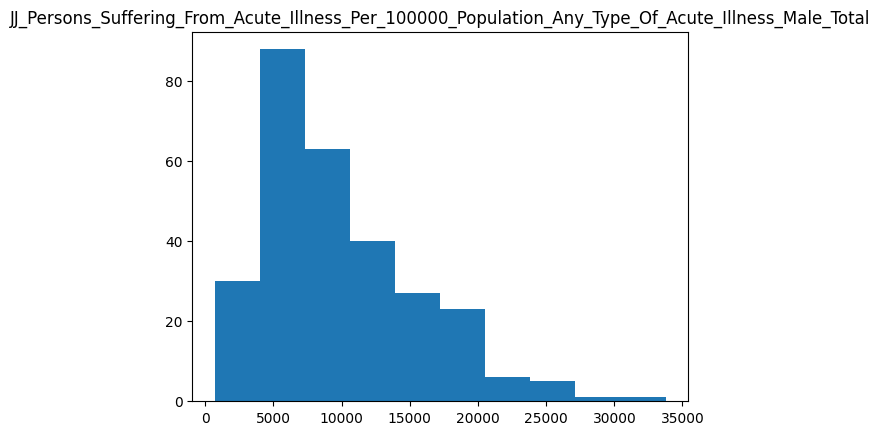

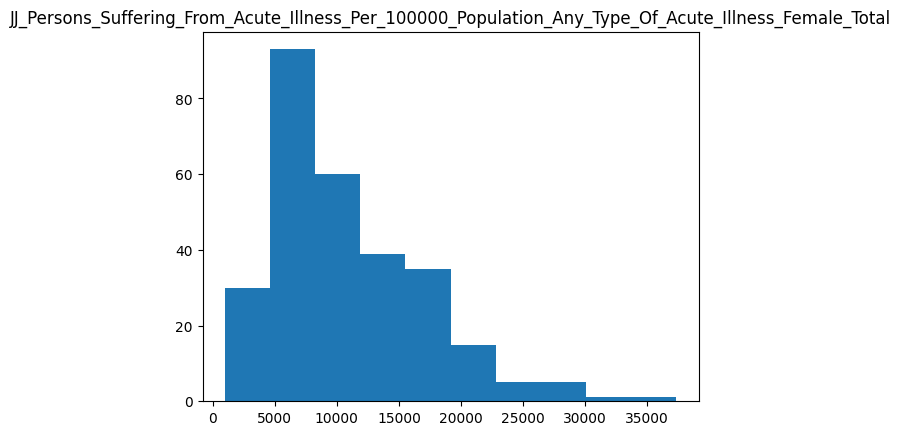

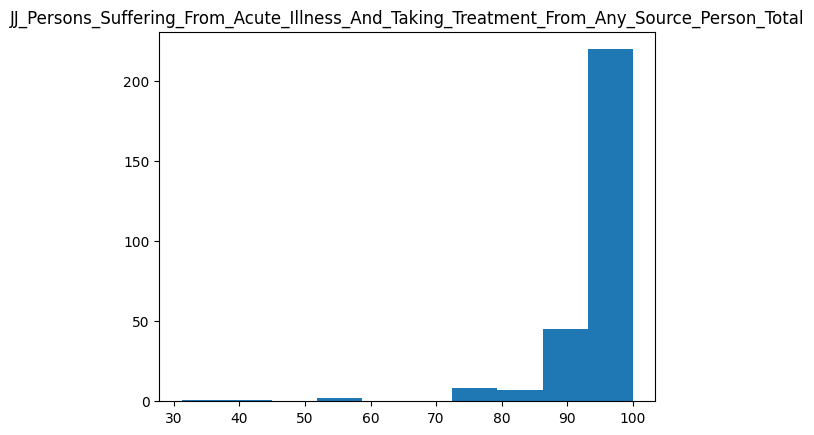

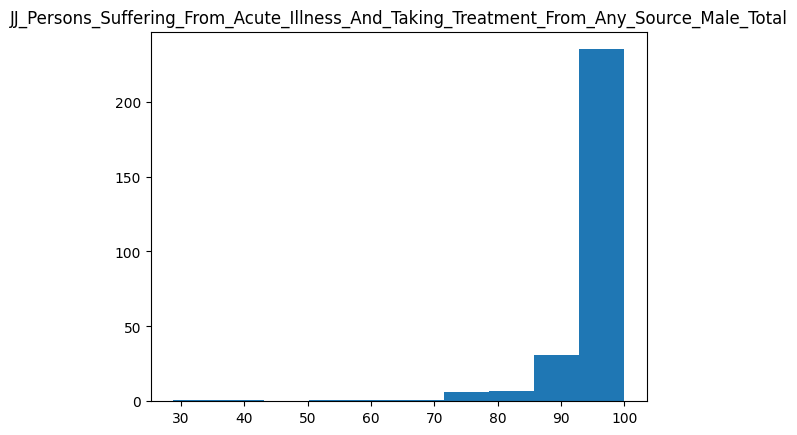

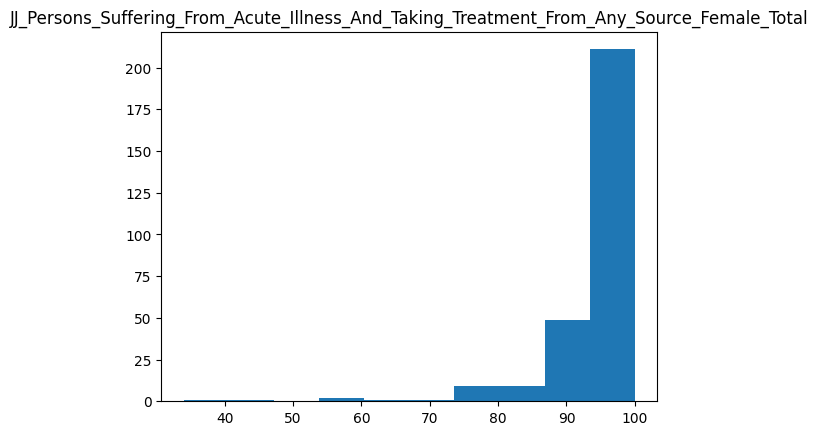

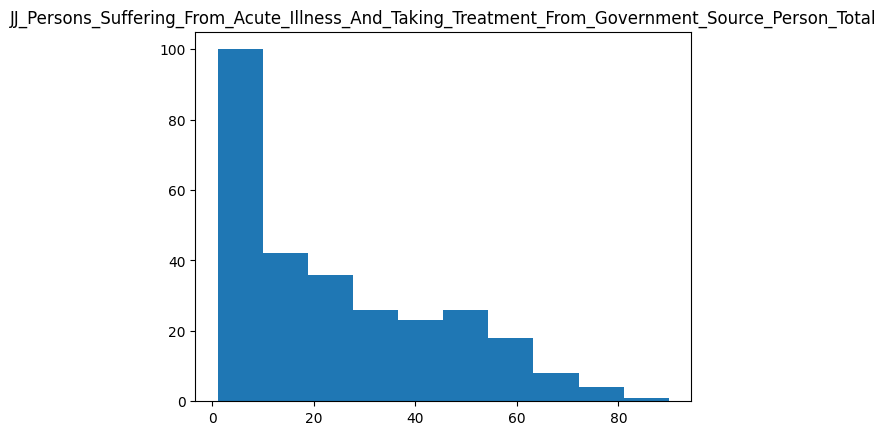

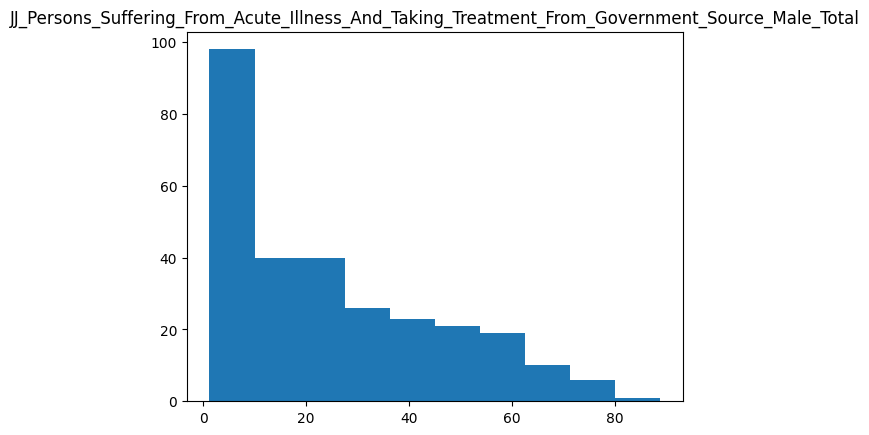

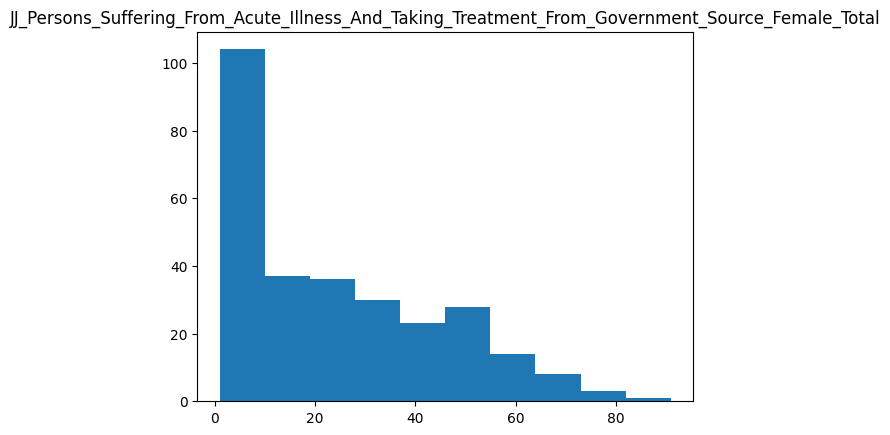

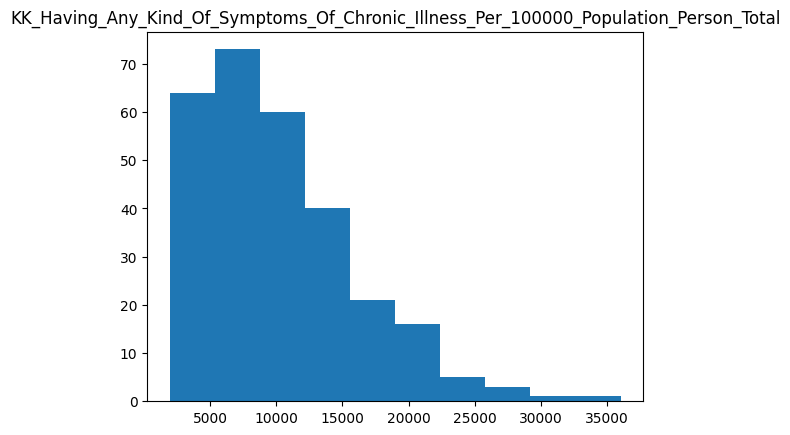

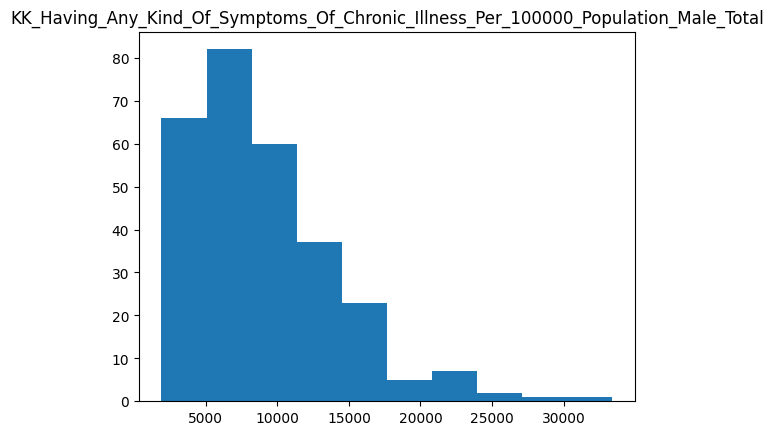

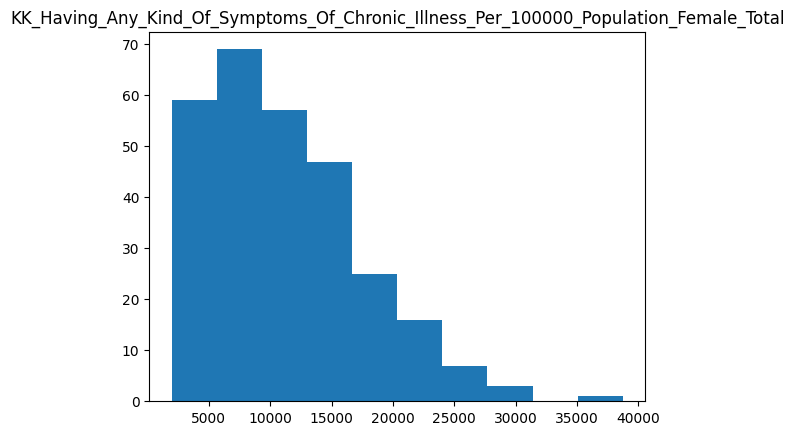

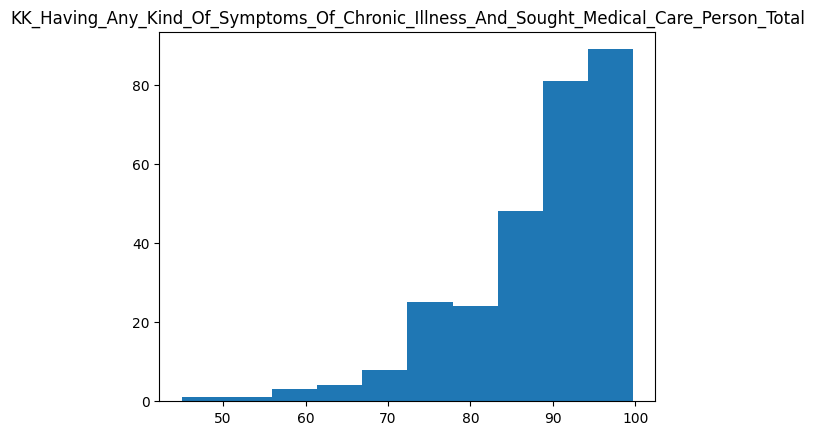

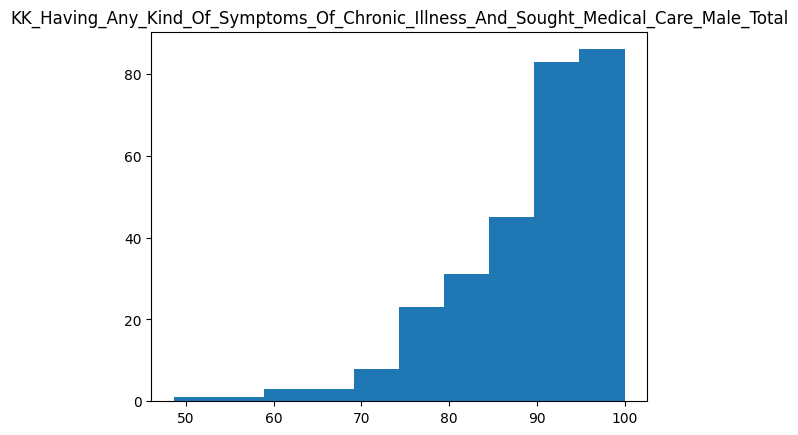

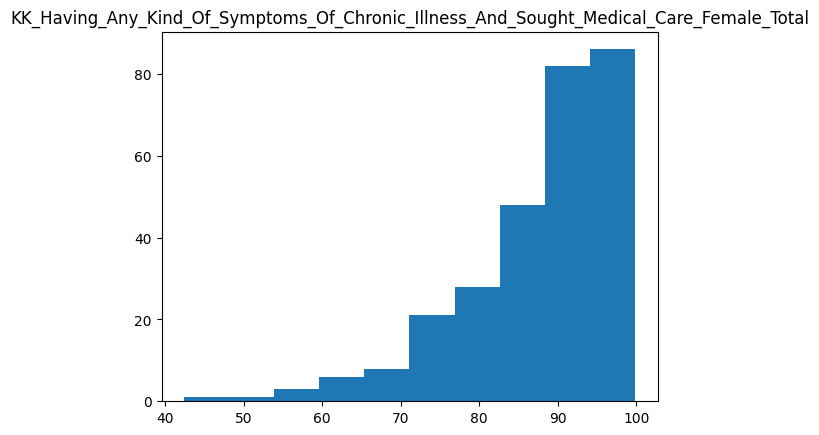

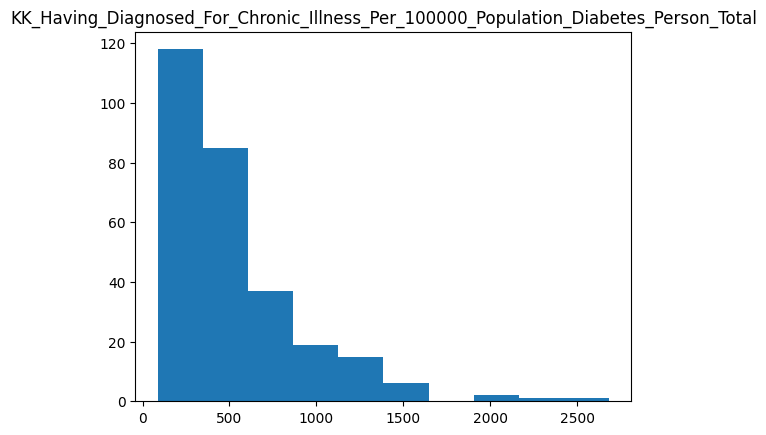

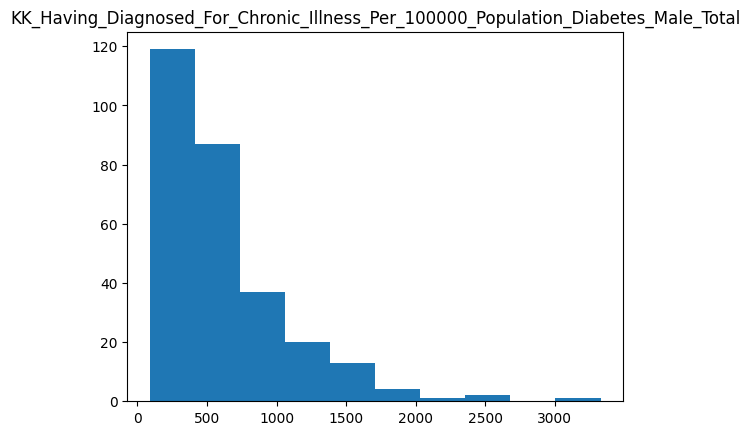

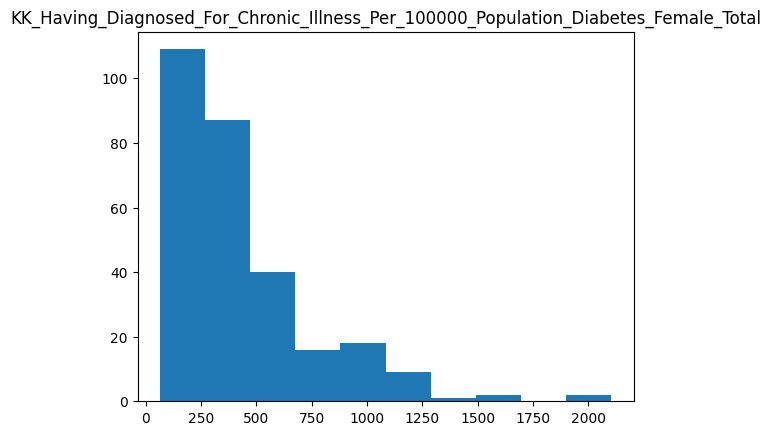

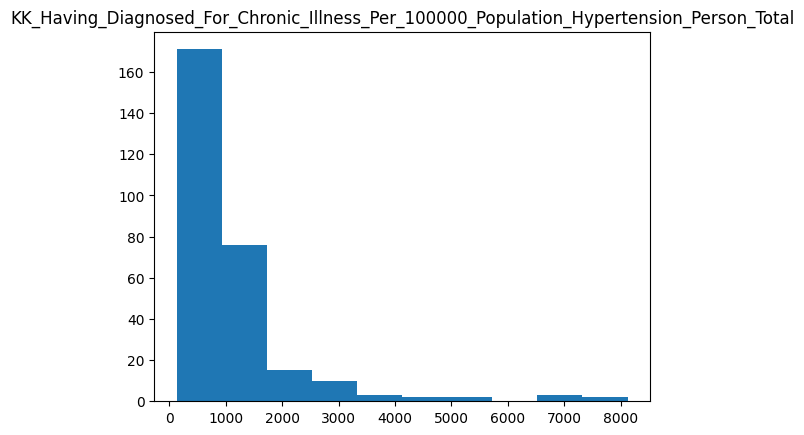

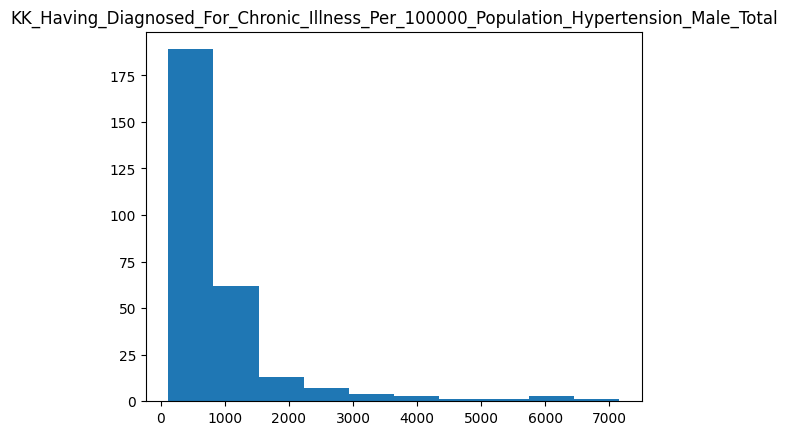

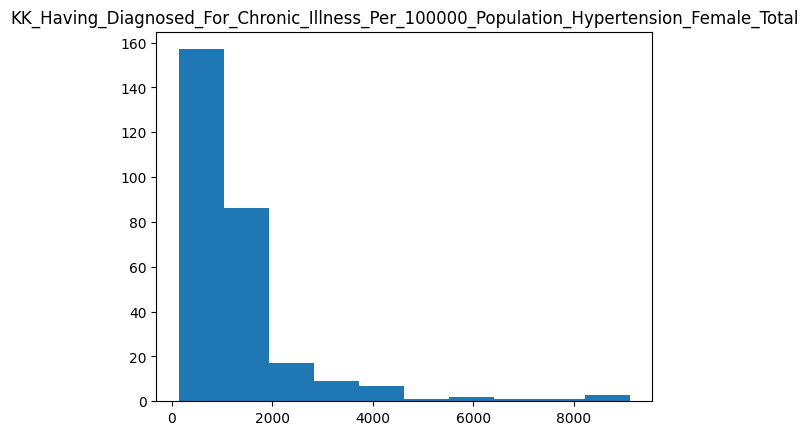

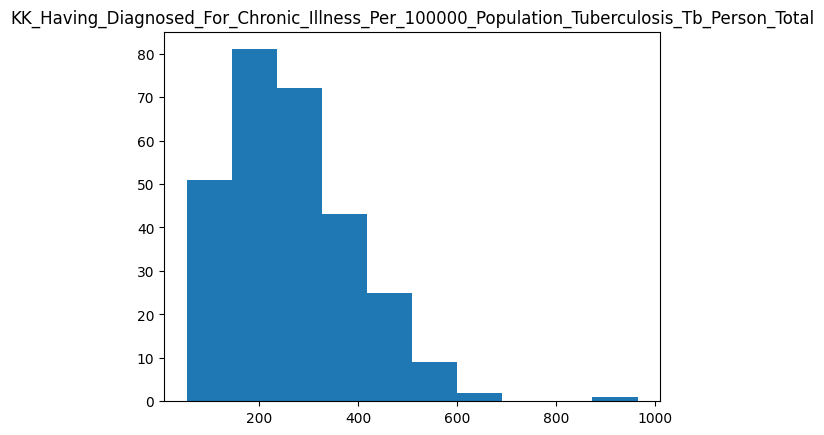

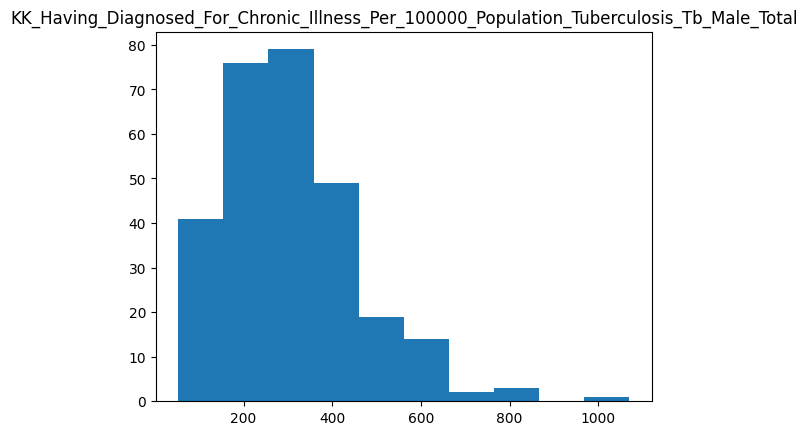

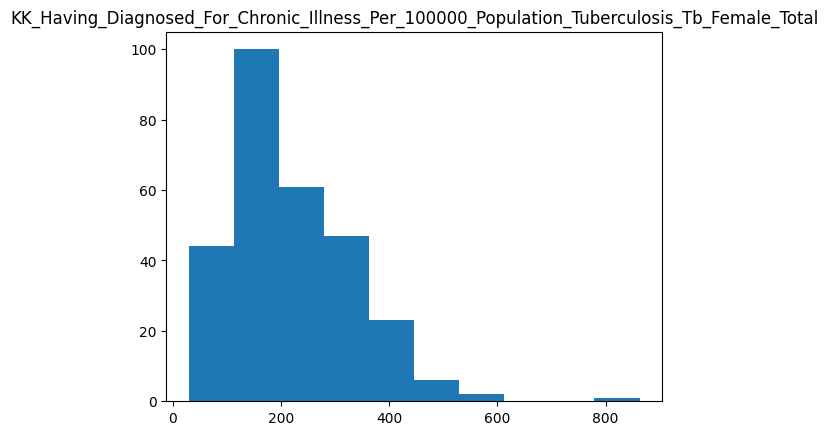

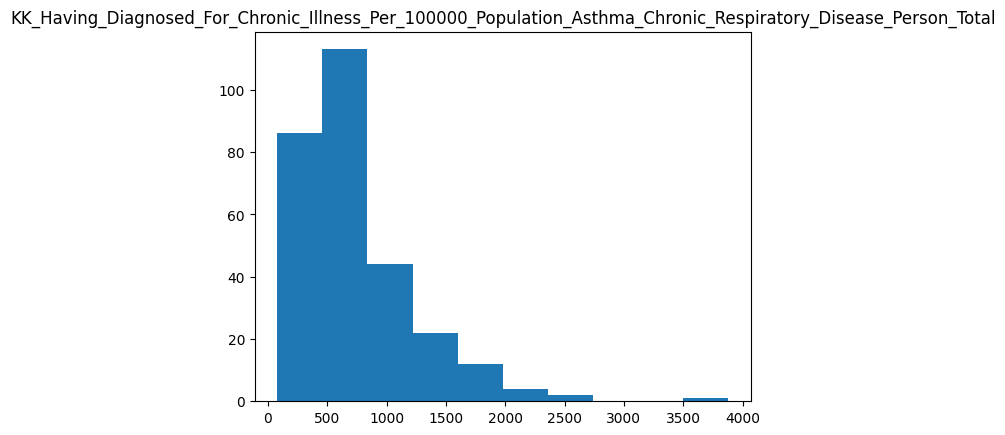

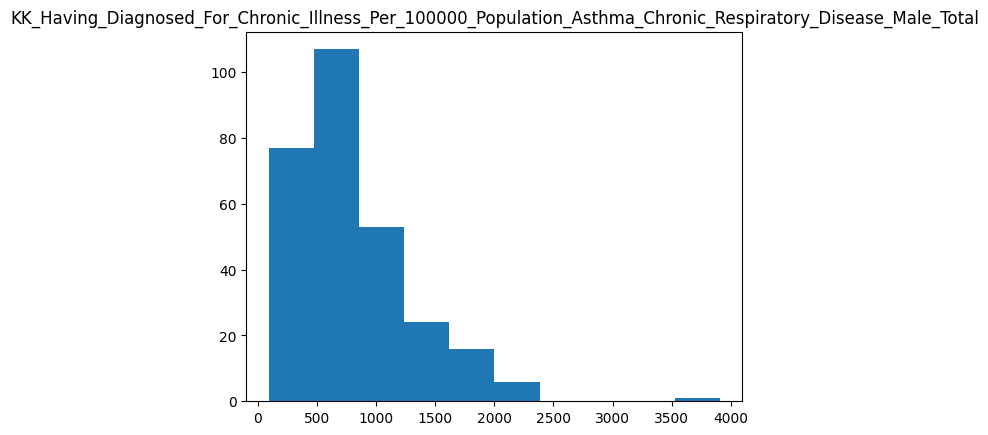

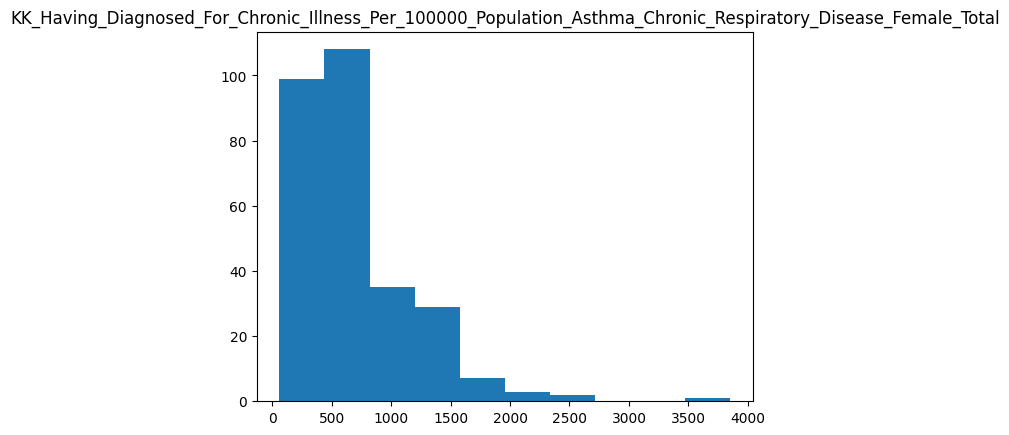

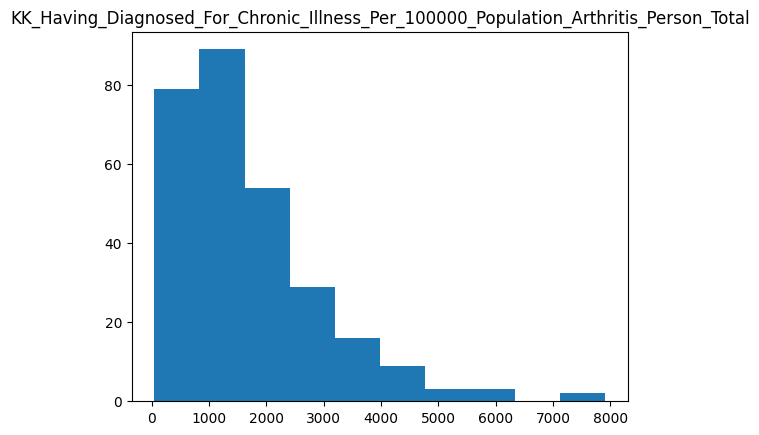

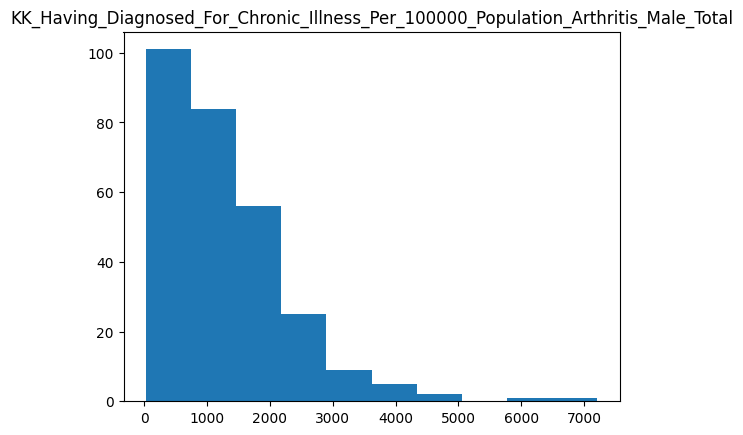

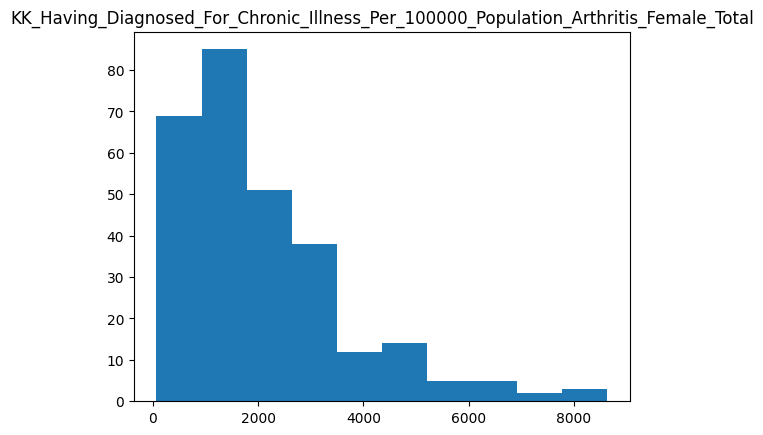

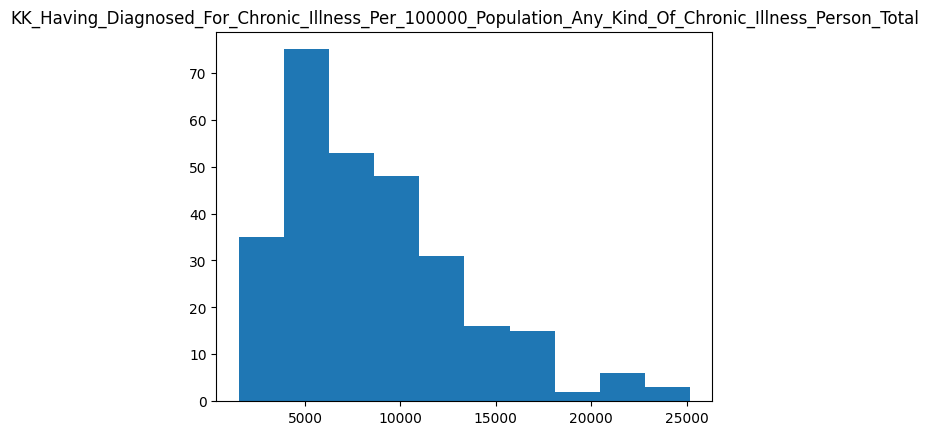

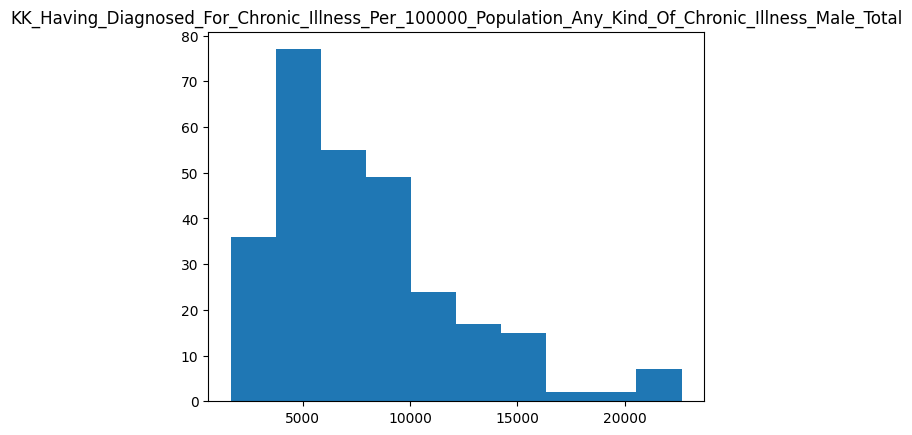

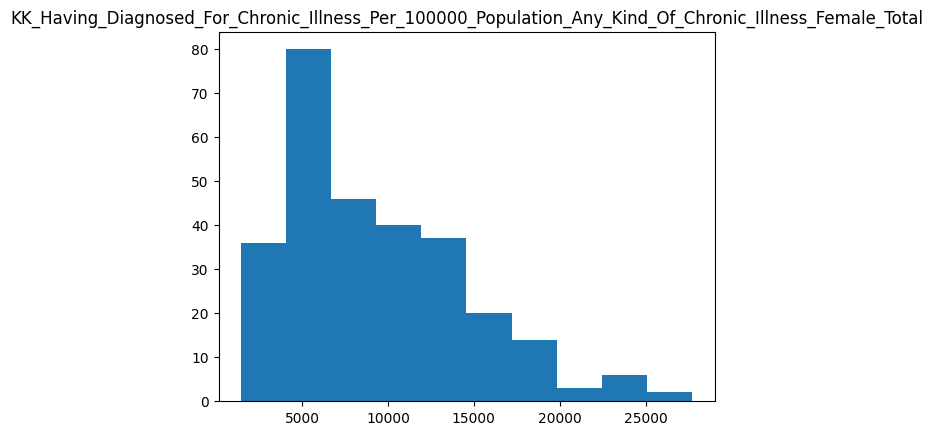

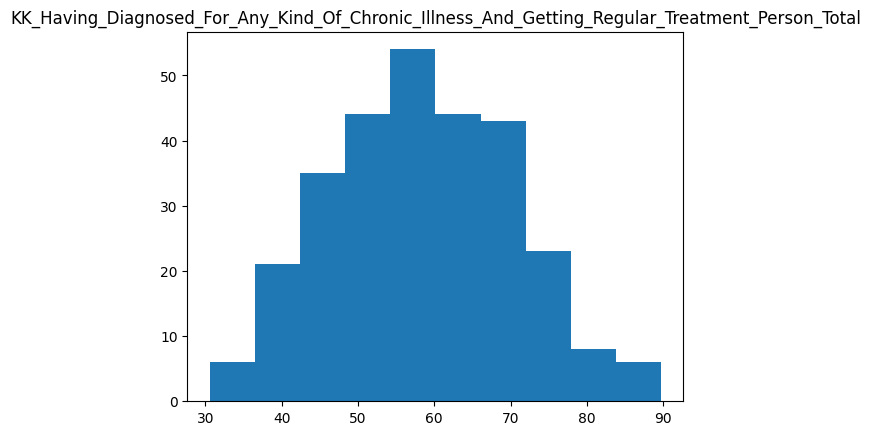

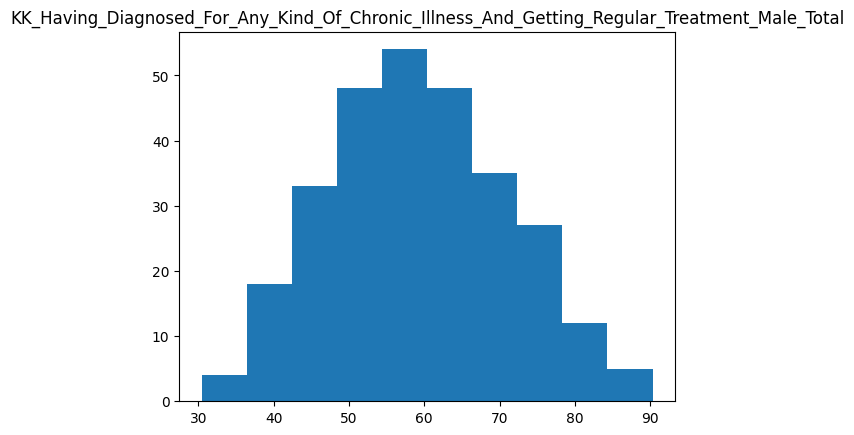

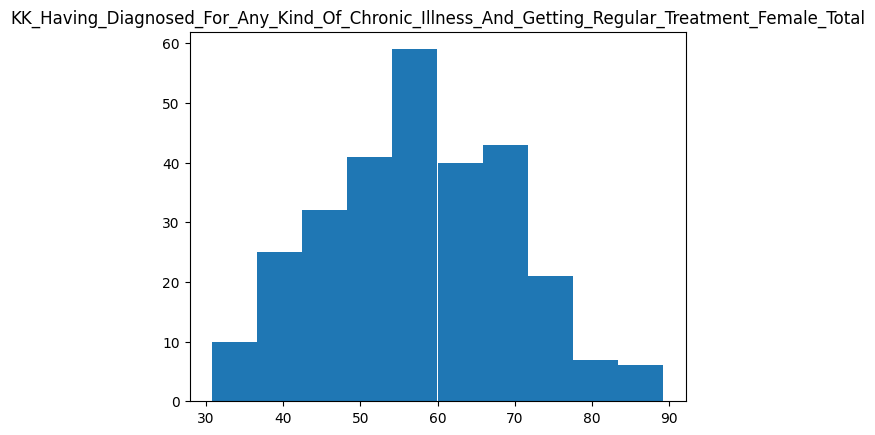

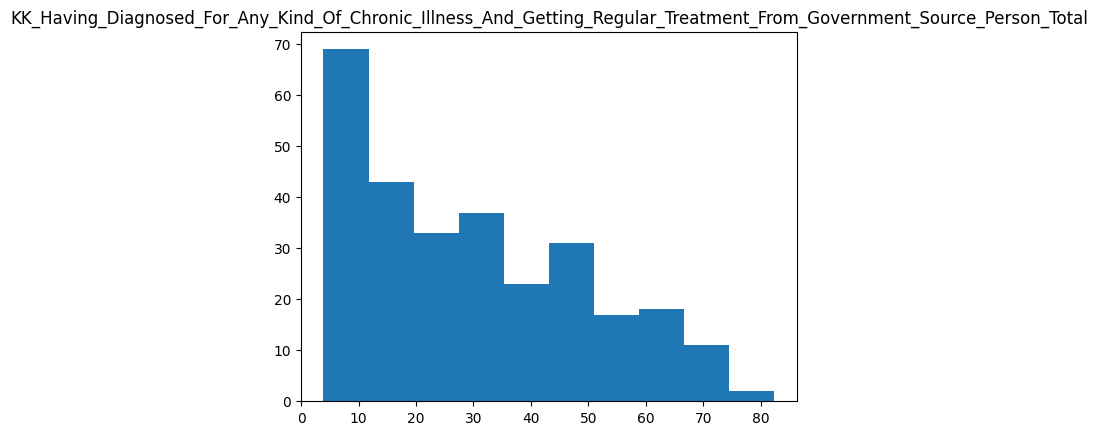

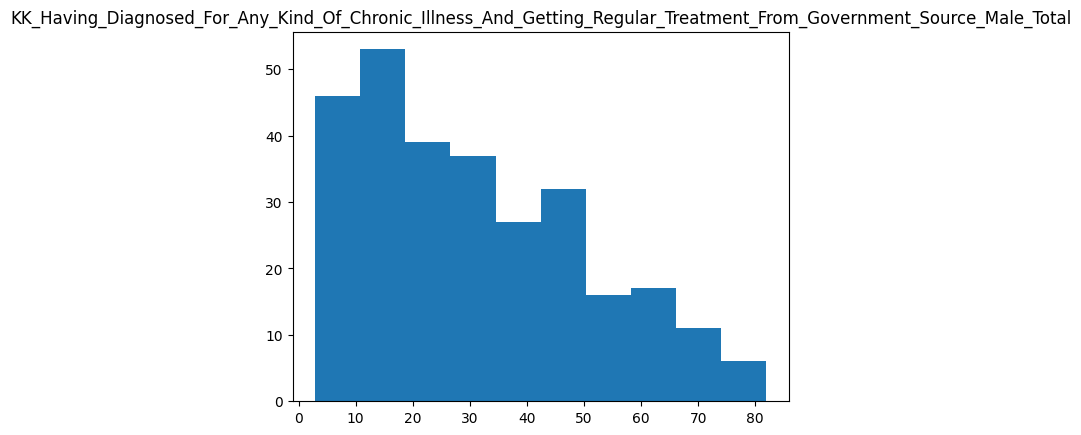

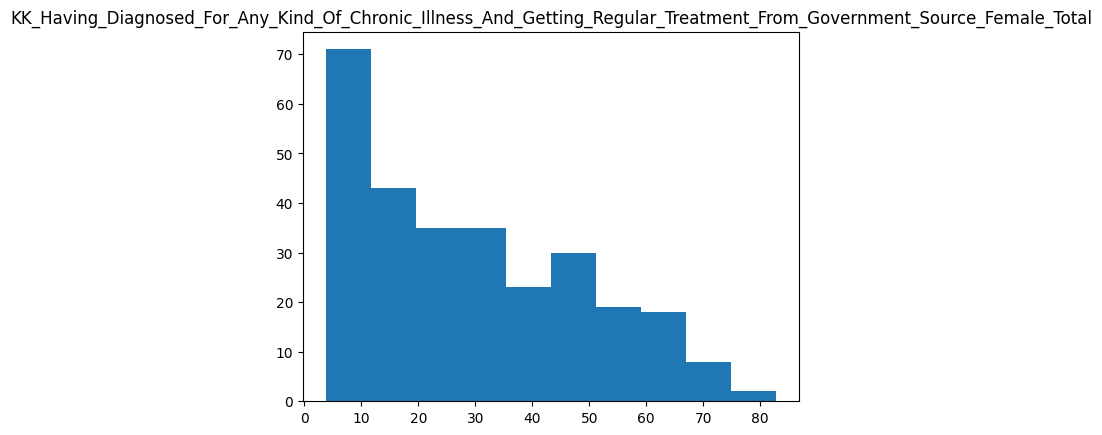

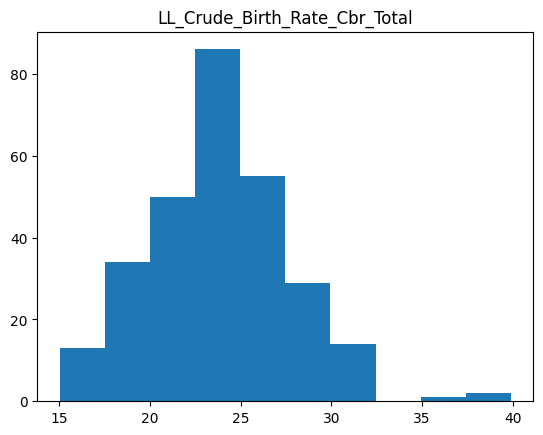

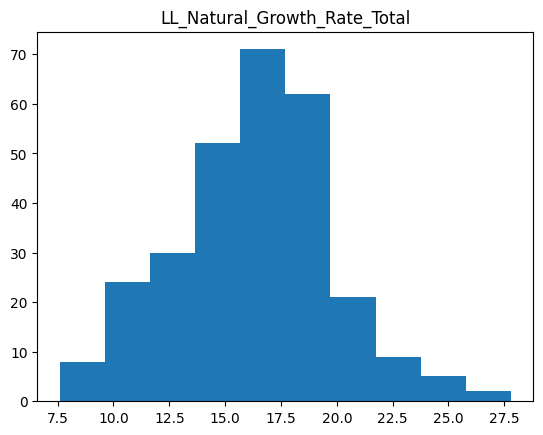

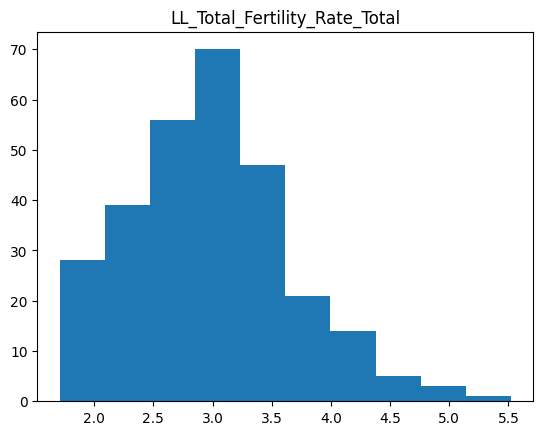

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6831: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6832: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

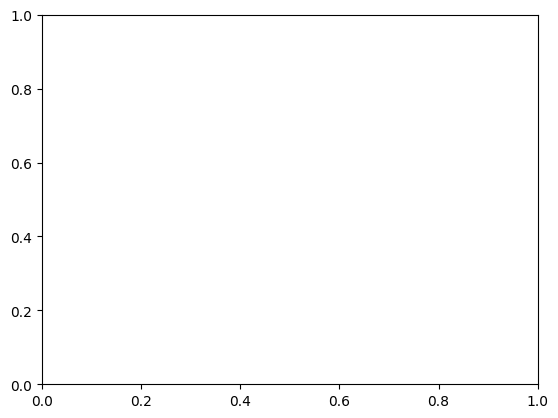

In [65]:
# Distributions for variable totals
for c in col_totals:
    plt.hist(df[c]), plt.title(c)
    plt.show()

In [66]:
## Null values for each feature with nulls
null_counts = nullcount(df)
has_null = dict()
for k,v in null_counts.items():
    if v>0:
        has_null[k]=v
sorted(has_null.items(), key = lambda item: item[1])

[('BB_Average_Household_Size_St_Urban', 1),
 ('LL_Crude_Birth_Rate_Cbr_Urban', 1),
 ('ZZ_Crude_Birth_Rate_Urban_Lower_Limit', 1),
 ('ZZ_Crude_Birth_Rate_Urban_Upper_Limit', 1),
 ('CC_Sex_Ratio_At_Birth_Urban', 3),
 ('LL_Natural_Growth_Rate_Urban', 3),
 ('YY_Crude_Death_Rate_Cdr_Urban_Person', 3),
 ('YY_Crude_Death_Rate_Cdr_Urban_Male', 3),
 ('YY_Crude_Death_Rate_Cdr_Urban_Female', 3),
 ('ZZ_Crude_Death_Rate_Urban_Lower_Limit', 3),
 ('ZZ_Crude_Death_Rate_Urban_Upper_Limit', 3),
 ('ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit', 9),
 ('ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit', 9),
 ('JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Acute_Respiratory_Infection_Ari_Person_Urban',
  44),
 ('JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Acute_Respiratory_Infection_Ari_Male_Urban',
  44),
 ('JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Acute_Respiratory_Infection_Ari_Female_Urban',
  44),
 ('JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_

In [67]:
## Number of features with nulls
len(has_null)

199